In [1]:
library(data.table)
library(stringr)
library(pheatmap)
library(ape)
library(ggplot2)
library(Rtsne)
library(sva)
library(VennDiagram)
library(readxl)
library(energy)
library(MASS)
library(quantreg)
library(limma)
library(Glimma)
library(edgeR)
library(RColorBrewer)
library(minerva)
library(dbscan)
library(amap)
library(NbClust)
library(apeglm)
library(gplots)
library(colorspace)
library(dendextend)
library(data.table)
library(topGO)
library(treemap)
library(factoextra)
library(ggrepel)
library(dplyr)
library(plyr)
library(cowplot)
library(colorRamps)
library(VennDiagram)

Loading required package: mgcv
Loading required package: nlme
This is mgcv 1.8-31. For overview type 'help("mgcv-package")'.
Loading required package: genefilter
Loading required package: BiocParallel
Loading required package: grid
Loading required package: futile.logger

Attaching package: ‘futile.logger’

The following object is masked from ‘package:mgcv’:

    scat


Attaching package: ‘VennDiagram’

The following object is masked from ‘package:ape’:

    rotate


Attaching package: ‘MASS’

The following object is masked from ‘package:genefilter’:

    area

Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess


---------------------
Welcome to dendextend version 1.13.4
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github pag

In [2]:
color_AD <- "#FF3300"
color_ND <- "blue"
color_CHC <- "#FFCC00"

In [3]:
default_color <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

color_long_list <- c(default_color, '#C1272D', '#0000A7', '#EECC16', '#008176', '#B3B3B3', '#7E6148B2')

In [4]:
load(file = "/Users/zhangmeng/Documents/Rstudio_workstation/100_plus_protein_viewer/exps_at_braak_stage.Rdata")

In [5]:
load(file = "/Users/zhangmeng/Documents/Rstudio_workstation/100_plus_protein_viewer/exps_at_age.Rdata")

In [6]:
setwd("~/ownCloud/Meng/")

In [7]:
High_quality_protein_intensity_matrix <- read.table('R_workstation/100_plus_proteomic_DATA/High_quality_protein_intensity_matrix.tsv', header =TRUE,
                                                    stringsAsFactors=F, sep = "\t")
dim(High_quality_protein_intensity_matrix)

[1] 3448  191

In [8]:
ANOVA_lm_test_res <- read.table('100_plus_results/sig_protein_list/ANOVA_lm_test_results.tsv', 
                                 header =TRUE, stringsAsFactors=F, sep = "\t")

In [9]:
Braak_proteins_472 <- read.table('100_plus_results/sig_protein_list/Braak_stage_related_proteins_472.tsv', 
                                 header =TRUE, stringsAsFactors=F, sep = "\t")

In [10]:
Braak_proteins_472

protein,gene,p_value_ANOVA,adj.p_value_ANOVA,effect_size_ANOVA,effect_size_lm,p_value_lm,adj.p_value_lm
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SYT12,SYT12,5.836626e-23,1.006234e-19,-1.1722376,-0.23924445,6.009909e-43,2.072217e-39
RPH3A,RPH3A,1.917868e-21,2.204269e-18,-1.5517087,-0.29806800,1.169479e-34,1.008091e-31
VGF,VGF,6.463818e-21,4.457449e-18,-2.2915211,-0.40605566,6.460878e-28,8.568118e-26
NDUFS3,NDUFS3,3.222281e-20,1.587204e-17,-0.5922395,-0.11366440,3.815273e-31,1.461673e-28
PDK3,PDK3,4.040558e-20,1.741481e-17,-0.8372619,-0.15445328,6.004327e-29,1.217819e-26
NDUFA12,NDUFA12,1.512614e-19,4.741358e-17,-0.5736917,-0.10887039,3.883245e-28,6.086103e-26
OLFM1,OLFM1,2.064424e-19,5.931778e-17,-1.0588640,-0.21413105,1.115892e-29,2.748283e-27
SLC25A11,SLC25A11,2.588178e-19,6.864643e-17,-0.5302484,-0.09835495,5.587740e-34,3.211088e-31
ACTN2;ACTN3,ACTN2,4.595280e-19,1.131752e-16,-1.2511038,-0.23509752,1.988611e-30,5.274409e-28


In [11]:
#load("Temp_results/pathology_related_proteins_lm.Rdata")
#
#Braak_sig_proteins <- rownames(pathology_related_proteins_lm)[pathology_related_proteins_lm$adjusted_p_value<0.05]
#
#length(Braak_sig_proteins)

In [12]:
load("Temp_results/Age_related_proteins_sig174.Rdata")

In [13]:
Age_related_proteins_sig174

,effect_size,p_value,adjusted_p_value,protein
,<dbl>,<dbl>,<dbl>,<chr>
SLC12A2,-0.016475472,6.647424e-08,2.292032e-04,SLC12A2
CARNS1,-0.030593665,1.316565e-05,4.539516e-02,CARNS1
MAP1B,-0.007200298,5.612407e-07,1.935158e-03,MAP1B
SLC16A1,-0.012967449,6.828580e-07,2.354494e-03,SLC16A1
IRGQ,-0.012766274,4.190605e-07,1.444921e-03,IRGQ
MTHFD1,0.005406671,8.151689e-06,2.810702e-02,MTHFD1
HSPA12A,-0.005648299,8.591300e-07,2.962280e-03,HSPA12A
FLOT1,0.006989682,5.530881e-06,1.907048e-02,FLOT1
KBTBD11,0.004197253,9.647289e-06,3.326385e-02,KBTBD11


In [14]:
Age_sig_proteins <- Age_related_proteins_sig174$protein

In [15]:
Age_sig_proteins[grep("MBP", Age_sig_proteins)]

[1] "RIMBP2"

In [16]:
load(file="Temp_results/Braak_2tests_results.Rdata")

In [17]:
Braak_2tests_sig472 <- subset(Braak_2tests, in_top20 == "yes")

In [18]:
Braak_2tests_sig472

,ANOVA_p_value,ANOVA_adjusted_p_value,ANOVA_effect_size,lm_effect_size,lm_p_value,lm_adjusted_p_value,in_top20
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
CASKIN1,3.981658e-14,1.430079e-12,-0.5876160,-0.10123382,1.069147e-21,2.972919e-20,yes
STIP1,2.347769e-08,1.530266e-07,1.6115302,0.28172617,8.287425e-17,1.009719e-15,yes
SYT12,5.836626e-23,1.006234e-19,-1.1722376,-0.23924445,6.009909e-43,2.072217e-39,yes
GRHPR,5.865249e-09,4.425247e-08,1.3230533,0.23555239,6.613055e-16,6.994422e-15,yes
BASP1,2.859927e-07,1.458732e-06,0.8253689,0.04440916,1.025208e-01,1.366944e-01,yes
DPYSL2,5.338907e-08,3.190209e-07,1.1512438,0.21547280,1.448779e-16,1.693353e-15,yes
FBXO41,8.425100e-09,6.115736e-08,-0.5275719,-0.11140086,7.940012e-11,3.922230e-10,yes
IRGQ,9.721749e-12,1.544728e-10,-0.7382583,-0.13651462,2.873240e-19,5.269645e-18,yes
DPYSL3,1.559117e-10,1.739753e-09,1.4713474,0.27161076,5.501910e-20,1.200670e-18,yes


In [19]:
Braak_sig_proteins <- rownames(Braak_2tests_sig472)

In [20]:
#x <- list(Braak_sig = rownames(Braak_2tests_sig472), 
#          Age_sig = Age_related_proteins_sig174$protein)
#
#path <- "100_plus_plots/proteomics/overlap_braak_and_aging_protein_472vs174_20220715.tiff"
#p <- venn.diagram(x, filename = path, imagetype = "png", fill=c('#E41A1C', '#377EB8'),
#             category.names=c("Braak stage related proteins","Age related proteins"), lwd = 0, alpha = 0.6, cat.dist=c(-0.12, -0.09),
#             width = 5, height = 5, units = 'in', res = 300)
##grid.draw(p)
#
#length(intersect(x$Braak_sig, x$Age_sig))

In [21]:
metadata <- read_excel("100_plus_project/Metadata/2019_07_23_Proteomics_Metadata_forMeng_v3.xlsx",
                       sheet=1,col_names=TRUE, na="NA")
metadata <- as.data.frame(metadata)
#colnames(metadata)

names_sample <- as.array(colnames(High_quality_protein_intensity_matrix)[2:ncol(High_quality_protein_intensity_matrix)])
names_sample <- as.vector(apply(names_sample, 1, function(names){return (str_sub(names, 11))}))

filenames_map_index <- integer(length(names_sample))
for (i in 1:length(names_sample)){
    if ((names_sample[i] %in% metadata[,"Mass-Spec filenames (1)"]) | 
        (names_sample[i] %in% metadata[,"Mass-Spec filenames (2)"]))
        filenames_map_index[i] <- ifelse(length(which(metadata[,"Mass-Spec filenames (1)"] == names_sample[i]))==0,
                                     which(metadata[,"Mass-Spec filenames (2)"] == names_sample[i]), 
                                     which(metadata[,"Mass-Spec filenames (1)"] == names_sample[i]))
    else
        print("ERROR, file name not in metadata!")
}

#print(filenames_map_index)

metadata <- metadata[filenames_map_index, ][c("nbb", "autopsy...3", "sex", "age", "weight", "GROUP...17", "pmd", "braak", "amyloid", "apoe")]
colnames(metadata) <- c("nbb", "autopsy", "sex", "age", "weight", "GROUP", "pmd", "braak", "amyloid", "apoe")
metadata$filenames <- names_sample

metadata$sex[(metadata$sex=='F') | (metadata$sex=='f')] <- "F"
metadata$sex[(metadata$sex=='M') | (metadata$sex=='m')] <- "M"
metadata$braak <- as.numeric(metadata$braak)
metadata$age <- as.numeric(metadata$age)

index_AD <- which(metadata$GROUP == "AD")
index_CHC <- which(metadata$GROUP == "CHC")
index_ND <- which(metadata$GROUP == "ND")
num_AD <- length(index_AD)
num_CHC <- length(index_CHC)
num_ND <- length(index_ND)

metadata[which((metadata$GROUP=="ND") & (is.na(metadata$braak))),]$braak <- median(metadata[index_ND,]$braak, na.rm = TRUE)
metadata[which((metadata$GROUP=="CHC") & (is.na(metadata$braak))),]$braak <- median(metadata[index_CHC,]$braak, na.rm = TRUE)

metadata$fBraak <- metadata$braak
metadata[which(metadata$braak == 0), ]$fBraak <- 1

metadata$cBraak <- as.numeric(lapply(metadata$braak, function(braak){if (braak==0 | braak==1 | braak==2)
                                                                return(1)
                                                          if (braak==3 | braak==4)
                                                                return(2)
                                                          if (braak==5 | braak==6)
                                                                return(3)}))

#metadata[which((metadata$GROUP=="AD") & (is.na(metadata$amyloid))),]$amyloid <- 'C'
#metadata[which((metadata$GROUP=="ND") & (is.na(metadata$amyloid))),]$amyloid <- 'A'
#metadata[which((metadata$GROUP=="CHC") & (is.na(metadata$amyloid))),]$amyloid <- 'B'


get_mod <- function(apoe){
    apoe_count <- as.matrix(table(apoe))
    return (rownames(apoe_count)[which.max(apoe_count)])
}

#metadata[which((metadata$GROUP=="AD") & (is.na(metadata$apoe))),]$apoe <- get_mod(metadata[index_AD,]$apoe)
metadata[which((metadata$GROUP=="ND") & (is.na(metadata$apoe))),]$apoe <- get_mod(metadata[index_ND,]$apoe)
#metadata[which((metadata$GROUP=="CHC") & (is.na(metadata$apoe))),]$apoe <- get_mod(metadata[index_CHC,]$apoe)

metadata$apoe_OR <- as.numeric(metadata$apoe)

metadata[which((metadata$apoe == 22)|(metadata$apoe == 23)|(metadata$apoe == 32)),]$apoe_OR <- 0.6
metadata[which((metadata$apoe == 24)|(metadata$apoe == 42)),]$apoe_OR <- 2.6
metadata[which(metadata$apoe == 33),]$apoe_OR <- 1
metadata[which((metadata$apoe == 34)|(metadata$apoe == 43)),]$apoe_OR <- 3.2
metadata[which(metadata$apoe == 44),]$apoe_OR <- 14.9

convert_time_2_numeric <- function(pmd){
    if (is.na(pmd))
        return (NA)
    else
        return (as.numeric(str_sub(pmd, start=1, end=2))+as.numeric(str_sub(pmd, 4))/60)
}

metadata$pmd_numeric <- apply(metadata["pmd"], 1, convert_time_2_numeric)
metadata[which(is.na(metadata$pmd_numeric)),]$pmd_numeric <- median(metadata$pmd_numeric, na.rm = TRUE)

New names:
• `autopsy` -> `autopsy...3`
• `GROUP` -> `GROUP...4`
• `Snumber` -> `Snumber...8`
• `Snumber` -> `Snumber...16`
• `GROUP` -> `GROUP...17`
• `tissuecode` -> `tissuecode...19`
• `autopsy` -> `autopsy...22`
• `tissuecode` -> `tissuecode...35`
• `` -> `...51`

In [22]:
load("100_plus_project/Metadata/metadata_clean_update20211215.Rdata")

metadata <- metadata_clean
colnames(metadata)

names_sample <- as.array(colnames(High_quality_protein_intensity_matrix)[2:ncol(High_quality_protein_intensity_matrix)])
names_sample <- as.vector(apply(names_sample, 1, function(names){return (str_sub(names, 11))}))

filenames_map_index <- integer(length(names_sample))
for (i in 1:length(names_sample)){
    if ((names_sample[i] %in% metadata[,"Mass-Spec filenames (1)"]) | 
        (names_sample[i] %in% metadata[,"Mass-Spec filenames (2)"]))
        filenames_map_index[i] <- ifelse(length(which(metadata[,"Mass-Spec filenames (1)"] == names_sample[i]))==0,
                                     which(metadata[,"Mass-Spec filenames (2)"] == names_sample[i]), 
                                     which(metadata[,"Mass-Spec filenames (1)"] == names_sample[i]))
    else
        print("ERROR, file name not in metadata!")
}

#print(filenames_map_index)

metadata <- metadata[filenames_map_index, ][c("nbb", "autopsy", "sex", "age", "weight", "GROUP", "pmd", "braak", 
                                              "Abeta", "APOE")]
colnames(metadata) <- c("nbb", "autopsy", "sex", "age", "weight", "GROUP", "pmd", "braak", "amyloid", "apoe")
metadata$filenames <- names_sample

colSums(is.na(metadata))

metadata$sex[(metadata$sex=='F') | (metadata$sex=='f')] <- "F"
metadata$sex[(metadata$sex=='M') | (metadata$sex=='m')] <- "M"
metadata$braak <- as.numeric(metadata$braak)
metadata$age <- as.numeric(metadata$age)


index_AD <- which(metadata$GROUP == "AD")
index_CHC <- which(metadata$GROUP == "CHC")
index_ND <- which(metadata$GROUP == "ND")
num_AD <- length(index_AD)
num_CHC <- length(index_CHC)
num_ND <- length(index_ND)

metadata[which((metadata$GROUP=="ND") & (is.na(metadata$braak))),]$braak <- median(metadata[index_ND,]$braak, na.rm = TRUE)

metadata$fBraak <- metadata$braak
metadata[which(metadata$braak == 0), ]$fBraak <- 1

metadata$cBraak <- as.numeric(lapply(metadata$braak, function(braak){if (braak==0 | braak==1 | braak==2)
                                                                return(1)
                                                          if (braak==3 | braak==4)
                                                                return(2)
                                                          if (braak==5 | braak==6)
                                                                return(3)}))

metadata[which((metadata$GROUP=="AD") & (is.na(metadata$amyloid))),]$amyloid <- median(metadata[which((metadata$GROUP=="AD") & (!is.na(metadata$amyloid))),]$amyloid)
metadata[which((metadata$GROUP=="ND") & (is.na(metadata$amyloid))),]$amyloid <- median(metadata[which((metadata$GROUP=="ND") & (!is.na(metadata$amyloid))),]$amyloid)

metadata$O_amyloid <- sapply(metadata$amyloid, function(x){
    if(is.na(x)){
        return(NA)
    }
    if(round(x) == 0){
        return("O")
    }
    if(round(x) == 1){
        return("A")
    }
    if(round(x) == 2){
        return("B")
    }
    if(round(x) == 3){
        return("C")
    }
    
})

get_mod <- function(apoe){
    apoe_count <- as.matrix(table(apoe))
    return (rownames(apoe_count)[which.max(apoe_count)])
}

metadata[which((metadata$GROUP=="ND") & (is.na(metadata$apoe))),]$apoe <- get_mod(metadata[index_ND,]$apoe)

metadata$apoe_OR <- as.numeric(metadata$apoe)

metadata[which((metadata$apoe == 22)|(metadata$apoe == 23)|(metadata$apoe == 32)),]$apoe_OR <- 0.6
metadata[which((metadata$apoe == 24)|(metadata$apoe == 42)),]$apoe_OR <- 2.6
metadata[which(metadata$apoe == 33),]$apoe_OR <- 1
metadata[which((metadata$apoe == 34)|(metadata$apoe == 43)),]$apoe_OR <- 3.2
metadata[which(metadata$apoe == 44),]$apoe_OR <- 14.9

convert_time_2_numeric <- function(pmd){
    if (is.na(pmd))
        return (NA)
    else
        return (as.numeric(str_sub(pmd, start=1, end=2))+as.numeric(str_sub(pmd, 4))/60)
}

metadata$pmd_numeric <- apply(metadata["pmd"], 1, convert_time_2_numeric)
metadata[which(is.na(metadata$pmd_numeric)),]$pmd_numeric <- median(metadata$pmd_numeric, na.rm = TRUE)


[1] "nbb"                                 "autopsy"                            
 [3] "sampleprepRandomization (4 batches)" "zmRandomization (10 batches)"       
 [5] "Autopsy_nr"                          "GROUP"                              
 [7] "Mass-Spec filenames (1)"             "Mass-Spec filenames (2)"            
 [9] "Diagnosis"                           "sex"                                
[11] "age"                                 "braak"                              
[13] "amyloid"                             "pmd"                                
[15] "ph"                                  "weight"                             
[17] "csf"                                 "apoe"                               
[19] "barcode"                             "Abeta"                              
[21] "APOE"

nbb   autopsy       sex       age    weight     GROUP       pmd     braak 
        0         0         0         0         2         0         2         2 
  amyloid      apoe filenames 
       17        16         0

In [23]:
cal_sample_batch_index <- function(sample_names){
    sample_index <- apply(as.data.frame(sample_names), 1, str_sub, -3)
    for (i in 1:length(sample_index)){
        sample_index[i] <- gsub("_", "0", sample_index[i])
    }
    sample_index <- as.numeric(sample_index)
    sample_index <- (sample_index - 1) %/% 8
    extra_batch <- max(sample_index, na.rm=TRUE) + 1
    sample_index[is.na(sample_index)] <- extra_batch
    return(sample_index)
}

protein_intensity_combat <- ComBat(dat=log2(as.matrix(High_quality_protein_intensity_matrix[,-1])), 
                                     batch=cal_sample_batch_index(metadata$filenames), mod=NULL, par.prior=TRUE, prior.plots=FALSE)
rownames(protein_intensity_combat) <- High_quality_protein_intensity_matrix$protein

Warning message in cal_sample_batch_index(metadata$filenames):
“NAs introduced by coercion”Found29batches
Adjusting for0covariate(s) or covariate level(s)


Standardizing Data across genes


Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data



In [24]:
cal_median_for_stage <- function(protein_intens, braak){
    intens <- numeric(0)
    for(i in sort(unique(braak))){
        intens <- c(intens, median(protein_intens[which(braak == i)]))
    }
    return(intens)
}

cal_mean_for_stage <- function(protein_intens, braak){
    intens <- numeric(0)
    for(i in sort(unique(braak))){
        intens <- c(intens, mean(protein_intens[which(braak == i)]))
    }
    return(intens)
}


In [25]:
group_protein_plot <- function(protein_list, title){#, ylim1, ylim2){
    
    protein_index <- sapply(protein_list, 
                            function(x){return(which(rownames(protein_intensity_combat) == x))})
    if(length(protein_index) != 1)
        exps_at_stage <- as.data.frame(t(apply(protein_intensity_combat[protein_index, ][, -index_CHC], 1,
                                           cal_median_for_stage, metadata[-index_CHC, ]$fBraak)))
    else 
        exps_at_stage <- as.data.frame(t(cal_median_for_stage(as.numeric(protein_intensity_combat[protein_index, ][-index_CHC]),
                                                              metadata[-index_CHC, ]$fBraak)))
    
    #if(length(protein_index) != 1)
    #    exps_at_stage <- as.data.frame(t(apply(protein_intensity_combat[protein_index, ], 1,
    #                                       cal_median_for_stage, metadata$fBraak)))
    #else 
    #    exps_at_stage <- as.data.frame(t(cal_median_for_stage(as.numeric(protein_intensity_combat[protein_index, ]),
    #                                                         metadata$fBraak)))
    
    #print(exps_at_stage)
    
    exps_at_stage <- 2 ^ exps_at_stage
    exps_at_stage <- exps_at_stage / exps_at_stage[, 1]
    
    order_idx <- order(exps_at_stage[, 6], decreasing = TRUE)
    
    braak  <- sort(unique(metadata[-index_CHC, ]$fBraak))
    #braak  <- sort(unique(metadata$fBraak))
    intens <- as.vector(t(exps_at_stage))    
    protein <- NULL
    is_sig <- NULL
    is_sig_perprotein <- NULL
    for(i in protein_list){
        protein <- c(protein, rep(i, ncol(exps_at_stage)))
        if (i %in% Braak_sig_proteins){
            is_sig <- c(is_sig, rep("yes", ncol(exps_at_stage)))
            is_sig_perprotein <- c(is_sig_perprotein, 1)
        }else{
            is_sig <- c(is_sig, rep("no", ncol(exps_at_stage)))
            is_sig_perprotein <- c(is_sig_perprotein, 0.3)
        }
    }
    
    braak <- rep(braak, nrow(exps_at_stage))
    
    plot_df <- data.frame(protein = protein,
                          intens = intens,
                          braak = braak,
                          alpha = is_sig)
    
    plot_df$protein <- factor(plot_df$protein, levels = protein_list[order_idx])
    
    
    
    #print(plot_df)
    
    p <- ggplot(plot_df, aes(x = braak, y = intens)) +
            geom_line(aes(linetype = protein, alpha = protein, color = protein)) +
            geom_point(aes(alpha = protein, color = protein)) +
            xlab("Braak stage") + 
            ylab("LFQ intensity ratio") +
            ggtitle(title) +
            scale_x_continuous(breaks=seq(1,6,1), labels = c("0/I", "II", "III", "IV", "V", "VI")) +
            #ylim(ylim1, ylim2) + 
            scale_linetype_manual(name = "", breaks = as.factor(protein_list[order_idx]),
                                  values = seq(1, length(protein_list)),
                                  labels = protein_list[order_idx]) +
    
            scale_color_manual(name = "", breaks = as.factor(protein_list[order_idx]),
                                  values = colorRampPalette(brewer.pal(9, "Set1"))(length(protein_list)),
                                  labels = protein_list[order_idx]) +
    
            scale_alpha_manual(name = "", breaks = as.factor(protein_list[order_idx]),
                                  values = is_sig_perprotein[order_idx],
                                  labels = protein_list[order_idx]) +
    
            #guides(alpha = FALSE) +
    
            geom_hline(yintercept=1)+
            
            theme(#plot.background = element_rect(),    # Background of the entire plot
                panel.background = element_rect(fill = "white"),   # Background of plotting area
                panel.border = element_rect(colour = "gray", fill=NA, size=1), 
                panel.grid = element_line(),         # All grid lines
                legend.key=element_rect(fill='white', colour = "gray", size = 0.1),
                legend.key.size = unit(0.5, 'cm'), #change legend key size
                legend.key.height = unit(0.5, 'cm'), #change legend key height
                legend.key.width = unit(0.5, 'cm'),
                legend.text = element_text(size = 8, color = "black"),
                plot.margin = ggplot2::margin(0, 0, 0.3, 0, "cm")
            )
                
    
    return(p)
}

In [26]:
generate_Braak_protein_df <- function(protein_list){
    
    protein_index <- sapply(protein_list, 
                            function(x){return(which(rownames(protein_intensity_combat) == x))})
    if(length(protein_index) != 1)
        exps_at_stage <- as.data.frame(t(apply(protein_intensity_combat[protein_index, ][, -index_CHC], 1,
                                           cal_mean_for_stage, metadata[-index_CHC, ]$fBraak)))
    else 
        exps_at_stage <- as.data.frame(t(cal_mean_for_stage(as.numeric(protein_intensity_combat[protein_index, ][-index_CHC]),
                                                              metadata[-index_CHC, ]$fBraak)))
    
    exps_at_stage <- 2 ^ exps_at_stage
    exps_at_stage_NDAD <- exps_at_stage
    exps_at_stage <- exps_at_stage / exps_at_stage[, 1]
    
    order_idx <- order(exps_at_stage[, 6], decreasing = TRUE)
    
    braak  <- sort(unique(metadata[-index_CHC, ]$fBraak))
    #braak  <- sort(unique(metadata$fBraak))
    intens <- as.vector(t(exps_at_stage))    
    protein <- NULL
    is_sig <- NULL
    is_sig_alpha <- NULL
    is_sig_linet <- NULL
    for(i in protein_list){
        protein <- c(protein, rep(i, ncol(exps_at_stage)))
        if (i %in% Braak_sig_proteins){
            is_sig <- c(is_sig, rep("yes", ncol(exps_at_stage)))
            is_sig_alpha <- c(is_sig_alpha, 1)
            is_sig_linet <- c(is_sig_linet, 1)
        }else{
            is_sig <- c(is_sig, rep("no", ncol(exps_at_stage)))
            is_sig_alpha <- c(is_sig_alpha, 0.3)
            is_sig_linet <- c(is_sig_linet, 3)
        }
    }
    
    braak <- rep(braak, nrow(exps_at_stage))
    
    plot_df <- data.frame(protein = protein,
                          intens = intens,
                          braak = braak,
                          alpha = is_sig)
    
    plot_df$protein <- factor(plot_df$protein, levels = protein_list[order_idx])
    
    ylim1 <- min(plot_df$intens)
    ylim2 <- max(plot_df$intens)
    
    return(list(plot_df = plot_df, 
                exps_at_stage_NDAD = exps_at_stage_NDAD,
                order_idx = order_idx, 
                is_sig_alpha = is_sig_alpha, 
                is_sig_linet = is_sig_linet, 
                ylim1 = ylim1, ylim2 = ylim2))
}


#Our transformation function
scaleFUN <- function(x) sprintf("%.1f", x)

make_Braak_plot <- function(protein_list, title, plot_df, order_idx, is_sig_linet, is_sig_alpha, ylim1, ylim2){
    p <- ggplot(plot_df, aes(x = braak, y = intens)) +
        geom_line(aes(linetype = protein, alpha = protein, color = protein)) +
        geom_point(aes(alpha = protein, color = protein)) +
        xlab("Braak stage") + 
        ylab("LFQ intensity ratio") +
        ggtitle("ND&AD groups") +
        scale_x_continuous(breaks=seq(1,6,1), labels = c("0/I", "II", "III", "IV", "V", "VI")) +
        scale_y_continuous(limits = c(ylim1, ylim2), labels=scaleFUN) + 
        scale_linetype_manual(name = "", breaks = as.factor(protein_list[order_idx]),
                              values = is_sig_linet[order_idx],
                              labels = protein_list[order_idx]) +
    
        scale_color_manual(name = "", breaks = as.factor(protein_list[order_idx]),
                              values = colorRampPalette(brewer.pal(9, "Set1"))(length(protein_list)),
                              labels = protein_list[order_idx]) +
    
        scale_alpha_manual(name = "", breaks = as.factor(protein_list[order_idx]),
                              values = is_sig_alpha[order_idx],
                              labels = protein_list[order_idx]) +
    
        #guides(alpha = FALSE) +
    
        geom_hline(yintercept=1)+
        
        theme(#plot.background = element_rect(),    # Background of the entire plot
            panel.background = element_rect(fill = "white"),   # Background of plotting area
            panel.border = element_rect(colour = "black", fill=NA, size=1), 
            panel.grid = element_line(),         # All grid lines
            legend.key=element_rect(fill='white', colour = "gray", size = 0.1),
            legend.key.size = unit(0.5, 'cm'), #change legend key size
            legend.key.height = unit(0.5, 'cm'), #change legend key height
            legend.key.width = unit(0.5, 'cm'),
            legend.text = element_text(size = 8, color = "black"),
            plot.margin = ggplot2::margin(0, 0, 0.3, 0, "cm")
        )
            
    
    return(p)
}

In [27]:
generate_Braak_protein_CHCdf <- function(protein_list, exps_at_stage_NDAD){
    
    protein_index <- sapply(protein_list, 
                            function(x){return(which(rownames(protein_intensity_combat) == x))})
    if(length(protein_index) != 1)
        exps_at_stage <- as.data.frame(t(apply(protein_intensity_combat[protein_index, ][, index_CHC], 1,
                                           cal_mean_for_stage, metadata[index_CHC, ]$fBraak)))
    else 
        exps_at_stage <- as.data.frame(t(cal_mean_for_stage(as.numeric(protein_intensity_combat[protein_index, ][index_CHC]),
                                                              metadata[index_CHC, ]$fBraak)))
    
    exps_at_stage <- 2 ^ exps_at_stage
    exps_at_stage <- exps_at_stage / exps_at_stage_NDAD[, 1]
    
    order_idx <- order(exps_at_stage[, ncol(exps_at_stage)], decreasing = TRUE)
    
    braak  <- sort(unique(metadata[index_CHC, ]$fBraak))
    #braak  <- sort(unique(metadata$fBraak))
    intens <- as.vector(t(exps_at_stage))    
    protein <- NULL
    is_sig <- NULL
    is_sig_alpha <- NULL
    is_sig_linet <- NULL
    for(i in protein_list){
        protein <- c(protein, rep(i, ncol(exps_at_stage)))
        if (i %in% Braak_sig_proteins){
            is_sig <- c(is_sig, rep("yes", ncol(exps_at_stage)))
            is_sig_alpha <- c(is_sig_alpha, 1)
            is_sig_linet <- c(is_sig_linet, 1)
        }else{
            is_sig <- c(is_sig, rep("no", ncol(exps_at_stage)))
            is_sig_alpha <- c(is_sig_alpha, 0.3)
            is_sig_linet <- c(is_sig_linet, 3)
        }
    }
    
    braak <- rep(braak, nrow(exps_at_stage))
    
    plot_df <- data.frame(protein = protein,
                          intens = intens,
                          braak = braak,
                          alpha = is_sig)
    
    plot_df$protein <- factor(plot_df$protein, levels = protein_list[order_idx])
    
    ylim1 <- min(plot_df$intens)
    ylim2 <- max(plot_df$intens)
    
    return(list(plot_df = plot_df, 
                order_idx = order_idx, 
                is_sig_alpha = is_sig_alpha, 
                is_sig_linet = is_sig_linet, 
                ylim1 = ylim1, ylim2 = ylim2))
}

make_Braak_CHCplot <- function(protein_list, title, plot_df, order_idx, is_sig_linet, is_sig_alpha, ylim1, ylim2){
    p <- ggplot(plot_df, aes(x = braak, y = intens)) +
        geom_line(aes(linetype = protein, alpha = protein, color = protein)) +
        geom_point(aes(alpha = protein, color = protein)) +
        xlab("Braak stage") + 
        ylab("") +
        ggtitle("Centenarian group") +
        scale_x_continuous(limits = c(1, 6), breaks=seq(1,6,1), labels = c("0/I", "II", "III", "IV", "V", "VI")) +
        scale_y_continuous(limits = c(ylim1, ylim2), labels=scaleFUN) + 
        scale_linetype_manual(name = "", breaks = as.factor(protein_list[order_idx]),
                              values = is_sig_linet[order_idx],
                              labels = protein_list[order_idx]) +
    
        scale_color_manual(name = "", breaks = as.factor(protein_list[order_idx]),
                              values = colorRampPalette(brewer.pal(9, "Set1"))(length(protein_list)),
                              labels = protein_list[order_idx]) +
    
        scale_alpha_manual(name = "", breaks = as.factor(protein_list[order_idx]),
                              values = is_sig_alpha[order_idx],
                              labels = protein_list[order_idx]) +
    
        #guides(alpha = FALSE) +
    
        geom_hline(yintercept=1)+
        
        theme(#plot.background = element_rect(),    # Background of the entire plot
            panel.background = element_rect(fill = "white"),   # Background of plotting area
            panel.border = element_rect(colour = "black", fill=NA, size=1), 
            panel.grid = element_line(),         # All grid lines
            legend.key=element_rect(fill='white', colour = "gray", size = 0.1),
            legend.key.size = unit(0.5, 'cm'), #change legend key size
            legend.key.height = unit(0.5, 'cm'), #change legend key height
            legend.key.width = unit(0.5, 'cm'),
            legend.text = element_text(size = 8, color = "black"),
            plot.margin = ggplot2::margin(0, 0, 0.3, 0, "cm")
        )
            
    
    return(p)
}

In [28]:
calc_distribution_per_age <- function(index, age, sample_idx, num_limit, boots = 50){
    set.seed(123)
    data <- data.frame(age = age, hallmark = protein_intensity_combat[index, ][sample_idx])
    
    data <- data[order(data$age), ]
    start <- data[floor(num_limit/2) + 1, ]$age
    end <- data[(nrow(data) - floor(num_limit/2)), ]$age
    #print(ND_start)
    #print(ND_end)
    
    hallmark_perAge <- NULL
    
    for(i in start:end){
        
        # start age
        if(i == start){
            ND_index <- 1:num_limit
            my_mean <- mean(data[ND_index,]$hallmark, na.rm = TRUE)
            hallmark_perAge <- c(hallmark_perAge, my_mean)
        }
        
        # end age
        if(i == end){
            ND_index <- (nrow(data) - num_limit + 1):nrow(data)
            my_mean <- mean(data[ND_index,]$hallmark, na.rm = TRUE)
            hallmark_perAge <- c(hallmark_perAge, my_mean)
        }

        
        if((i > start) & (i < end) & (i %in% unique(data$age))){
            if(length(which(data$age == i)) >= (num_limit - 1)){
                ND_index <- which(data$age == i)
                
                my_mean <- mean(data[ND_index,]$hallmark, na.rm = TRUE)
                hallmark_perAge <- c(hallmark_perAge, my_mean)
            }
            else{
                middle_index <- round(median(which(data$age == i)))
                
                start_end_age <- data[c((middle_index - floor(num_limit/2)), 
                                        (middle_index + floor(num_limit/2))), ]$age
                
                #print(middle_index)
                #print(start_end_age)
                
                constent_index <- which((data$age > start_end_age[1]) & (data$age < start_end_age[2]))
                
                start_residual_num <- constent_index[1] - (middle_index - floor(num_limit/2))
                end_residual_num <- (middle_index + floor(num_limit/2)) - constent_index[length(constent_index)]
                
                start_age_index <- which(data$age == start_end_age[1])
                end_age_index <- which(data$age == start_end_age[2])
                
                if((length(start_age_index)<start_residual_num) | (length(end_age_index)<end_residual_num))
                    cat("This is impossible!!!")
                
                residual_index <- NULL
                hallmark <- NULL
                for(j in 1:boots){
                    residual_i <- c(sample(start_age_index, size = start_residual_num, replace = FALSE), 
                                    sample(end_age_index, size = end_residual_num, replace = FALSE))
                    
                    residual_index <- rbind(residual_index, residual_i)
                    
                    hallmark <- rbind(hallmark, sort(data[c(constent_index, residual_i), ]$hallmark))
                }
                
                my_hallmark <- colMeans(hallmark)
                
                my_mean <- mean(my_hallmark, na.rm = TRUE)
                hallmark_perAge <- c(hallmark_perAge, my_mean)
            }

        }
    }
    
    return(hallmark_perAge)
}

calc_age <- function(age, num_limit){
    data <- age[order(age)]
    start <- data[floor(num_limit/2) + 1]
    end <- data[(length(data) - floor(num_limit/2))]

    Age <- NULL
    
    for(i in start:end){
        if(i %in% unique(data)){
            Age <- c(Age, i)
        }
    }
    return(Age)
}

In [29]:
calc_distribution_per_age_AD <- function(index, age, num_limit, boots = 50){
    set.seed(123)
    data <- data.frame(age = age, hallmark = protein_intensity_combat[index, ][index_AD])
    
    data <- data[order(data$age), ]
    start <- data[round(num_limit/2) + 1, ]$age
    end <- data[(nrow(data) - round(num_limit/2)), ]$age
    #print(ND_start)
    #print(ND_end)
    
    hallmark_perAge <- NULL
    
    for(i in start:end){
        
        # start age
        if(i == start){
            ND_index <- 1:num_limit
            my_mean <- mean(data[ND_index,]$hallmark, na.rm = TRUE)
            hallmark_perAge <- c(hallmark_perAge, my_mean)
        }
        
        # end age
        if(i == end){
            ND_index <- (nrow(data) - num_limit + 1):nrow(data)
            my_mean <- mean(data[ND_index,]$hallmark, na.rm = TRUE)
            hallmark_perAge <- c(hallmark_perAge, my_mean)
        }

        
        if((i > start) & (i < end) & (i %in% unique(data$age))){
            if(length(which(data$age == i)) >= (num_limit - 1)){
                ND_index <- which(data$age == i)
                
                my_mean <- mean(data[ND_index,]$hallmark, na.rm = TRUE)
                hallmark_perAge <- c(hallmark_perAge, my_mean)
            }
            else{
                middle_index <- round(median(which(data$age == i)))
                
                start_end_age <- data[c((middle_index - round(num_limit/2)), 
                                        (middle_index + round(num_limit/2))), ]$age
                
                #print(middle_index)
                #print(start_end_age)
                
                constent_index <- which((data$age > start_end_age[1]) & (data$age < start_end_age[2]))
                
                start_residual_num <- constent_index[1] - (middle_index - round(num_limit/2))
                end_residual_num <- (middle_index + round(num_limit/2)) - constent_index[length(constent_index)]
                
                start_age_index <- which(data$age == start_end_age[1])
                end_age_index <- which(data$age == start_end_age[2])
                
                if((length(start_age_index)<start_residual_num) | (length(end_age_index)<end_residual_num))
                    cat("This is impossible!!!")
                
                residual_index <- NULL
                hallmark <- NULL
                for(j in 1:boots){
                    residual_i <- c(sample(start_age_index, size = start_residual_num, replace = FALSE), 
                                    sample(end_age_index, size = end_residual_num, replace = FALSE))
                    
                    residual_index <- rbind(residual_index, residual_i)
                    
                    my_hallmark <- rbind(hallmark, sort(data[c(constent_index, residual_i), ]$hallmark))
                }
                
                my_hallmark <- colMeans(my_hallmark)
                
                my_mean <- mean(my_hallmark, na.rm = TRUE)
                hallmark_perAge <- c(hallmark_perAge, my_mean)
            }

        }
    }
    
    return(hallmark_perAge)
}

calc_age <- function(age, num_limit){
    data <- age[order(age)]
    start <- data[floor(num_limit/2) + 1]
    end <- data[(length(data) - floor(num_limit/2))]

    Age <- NULL
    
    for(i in start:end){
        if(i %in% unique(data)){
            Age <- c(Age, i)
        }
    }
    return(Age)
}

In [30]:
group_protein_age_plot <- function(protein_list, title){#, ylim1, ylim2){
    protein_list <- sort(protein_list)
    
    protein_index <- sapply(protein_list, 
                            function(x){return(which(rownames(protein_intensity_combat) == x))})
    
    if(length(protein_index) != 1)
        exps_at_stage <- as.data.frame(t(sapply(protein_index, calc_distribution_per_age, 
                                               metadata[c(index_ND), ]$age, 15)))
    else 
        exps_at_stage <- as.data.frame(t(calc_distribution_per_age(protein_index,
                                                                   metadata[c(index_ND), ]$age, 15)))
    
    exps_at_stage <- 2 ^ exps_at_stage
    exps_at_stage <- exps_at_stage / exps_at_stage[, 1]
    
    order_idx <- order(exps_at_stage[, ncol(exps_at_stage)], decreasing = TRUE)
    
    age  <- calc_age(metadata[c(index_ND), ]$age, 15)
    #print(age)
    
    intens <- as.vector(t(exps_at_stage))    
    protein <- NULL
    is_sig <- NULL
    is_sig_perprotein <- NULL
    for(i in protein_list){
        protein <- c(protein, rep(i, ncol(exps_at_stage)))
        if (i %in% Age_sig_proteins){
            is_sig <- c(is_sig, rep("yes", ncol(exps_at_stage)))
            is_sig_perprotein <- c(is_sig_perprotein, 1)
        }else{
            is_sig <- c(is_sig, rep("no", ncol(exps_at_stage)))
            is_sig_perprotein <- c(is_sig_perprotein, 0.3)
        }
    }
    
    age <- rep(age, nrow(exps_at_stage))
    
    plot_df <- data.frame(protein = protein,
                          intens = intens,
                          age = age,
                          alpha = is_sig)
    
    plot_df$protein <- factor(plot_df$protein, levels = protein_list[order_idx])
    
    
    #print(plot_df)
    
    p <- ggplot(plot_df, aes(x = age, y = intens)) +
            geom_line(aes(linetype = protein, alpha = protein, color = protein
                         )) +
            geom_point(aes(alpha = protein, color = protein)
            ) +
            xlab("Age [y]") + 
            ylab("LFQ intensity ratio") +
            ggtitle(title) +
            #scale_x_continuous(breaks=seq(1,6,1), labels = c("0/I", "II", "III", "IV", "V", "VI")) +
            #ylim(ylim1, ylim2) + 
            scale_linetype_manual(name = "", breaks = as.factor(protein_list[order_idx]),
                                  values = seq(1, length(protein_list)),
                                  labels = protein_list[order_idx]) +
            scale_color_manual(name = "", breaks = as.factor(protein_list[order_idx]),
                                  values = colorRampPalette(brewer.pal(9, "Set1"))(length(protein_list)),
                                  labels = protein_list[order_idx]) +
            scale_alpha_manual(name = "", breaks = as.factor(protein_list[order_idx]),
                                  values = is_sig_perprotein[order_idx],
                                  labels = protein_list[order_idx]) +
            #guides(alpha = FALSE) +
    
            geom_hline(yintercept=1)+
            
            theme(#plot.background = element_rect(),    # Background of the entire plot
                panel.background = element_rect(fill = "white"),   # Background of plotting area
                panel.border = element_rect(colour = "gray", fill=NA, size=1), 
                panel.grid = element_line(),         # All grid lines
                legend.key=element_rect(fill='white', colour = "gray", size = 0.1),
                legend.key.size = unit(0.5, 'cm'), #change legend key size
                legend.key.height = unit(0.5, 'cm'), #change legend key height
                legend.key.width = unit(0.5, 'cm'),
                legend.text = element_text(size = 8, color = "black"),
                plot.margin = ggplot2::margin(0, 0, 0.3, 0, "cm")
            )
                
    
    return(p)
}

In [31]:
generate_age_protein_df <- function(protein_list){
    #protein_list <- sort(protein_list)
    
    protein_index <- sapply(protein_list, 
                            function(x){return(which(rownames(protein_intensity_combat) == x))})
    
    if(length(protein_index) != 1)
        ND_exps_at_stage <- as.data.frame(t(sapply(protein_index, calc_distribution_per_age, 
                                               metadata[c(index_ND), ]$age, index_ND, 15)))
    else 
        ND_exps_at_stage <- as.data.frame(t(calc_distribution_per_age(protein_index,
                                                metadata[c(index_ND), ]$age, index_ND, 15)))
    
    if(length(protein_index) != 1)
        CHC_exps_at_stage <- as.data.frame(t(sapply(protein_index, calc_distribution_per_age, 
                                               metadata[c(index_CHC), ]$age, index_CHC, 15)))
    else 
        CHC_exps_at_stage <- as.data.frame(t(calc_distribution_per_age(protein_index,
                                                metadata[c(index_CHC), ]$age, index_CHC, 15)))
    
    exps_at_stage <- 2 ^ cbind(ND_exps_at_stage, CHC_exps_at_stage)
    exps_at_stage <- exps_at_stage / exps_at_stage[, 1]
    
    order_idx <- order(exps_at_stage[, ncol(exps_at_stage)], decreasing = TRUE)
    
    age  <- c(calc_age(metadata[c(index_ND), ]$age, 15), calc_age(metadata[c(index_CHC), ]$age, 15))
    #print(age)
    
    intens <- as.vector(t(exps_at_stage))    
    protein <- NULL
    is_sig <- NULL
    is_sig_alpha <- NULL
    is_sig_linet <- NULL
    for(i in protein_list){
        protein <- c(protein, rep(i, ncol(exps_at_stage)))
        if (i %in% Age_sig_proteins){
            is_sig <- c(is_sig, rep("yes", ncol(exps_at_stage)))
            is_sig_alpha <- c(is_sig_alpha, 1)
            is_sig_linet <- c(is_sig_linet, 1)
        }else{
            is_sig <- c(is_sig, rep("no", ncol(exps_at_stage)))
            is_sig_alpha <- c(is_sig_alpha, 0.3)
            is_sig_linet <- c(is_sig_linet, 3)
        }
    }
    
    age <- rep(age, nrow(exps_at_stage))
    
    plot_df <- data.frame(protein = protein,
                          intens = intens,
                          age = age,
                          alpha = is_sig)
    
    plot_df$protein <- factor(plot_df$protein, levels = protein_list[order_idx])
    
    ylim1 <- min(plot_df$intens)
    ylim2 <- max(plot_df$intens)
    
    return(list(plot_df = plot_df, 
                order_idx = order_idx, 
                is_sig_alpha = is_sig_alpha, 
                is_sig_linet = is_sig_linet, 
                ylim1 = ylim1, ylim2 = ylim2))
}

make_age_plot <- function(protein_list, title, plot_df, order_idx, is_sig_linet, is_sig_alpha, ylim1, ylim2){
    p <- ggplot(subset(plot_df, age <100), aes(x = age, y = intens)) +
            geom_line(aes(linetype = protein, alpha = protein, color = protein)) +
            geom_point(aes(alpha = protein, color = protein)) +
    
            geom_line(subset(plot_df, age >=100), mapping = aes(x = age, y = intens, 
                            linetype = protein, alpha = protein, color = protein)) +
            geom_point(subset(plot_df, age >=100), mapping = aes(x = age, y = intens,
                            alpha = protein, color = protein)) +
    
            xlab("Age [y]") + 
            ylab("") +
            ggtitle("ND&Centenarian goups") +
            #scale_x_continuous(breaks=seq(1,6,1), labels = c("0/I", "II", "III", "IV", "V", "VI")) +
            scale_y_continuous(limits = c(ylim1, ylim2), labels=scaleFUN) + 
            scale_linetype_manual(name = "", breaks = as.factor(protein_list[order_idx]),
                                  values = is_sig_linet[order_idx],
                                  labels = protein_list[order_idx]) +
            scale_color_manual(name = "", breaks = as.factor(protein_list[order_idx]),
                                  values = colorRampPalette(brewer.pal(9, "Set1"))(length(protein_list)),
                                  labels = protein_list[order_idx]) +
            scale_alpha_manual(name = "", breaks = as.factor(protein_list[order_idx]),
                                  values = is_sig_alpha[order_idx],
                                  labels = protein_list[order_idx]) +
            #guides(alpha = FALSE) +
    
            geom_hline(yintercept=1)+
            geom_vline(xintercept=100, linetype="dashed", color = "red", size=1)+
            
            theme(#plot.background = element_rect(),    # Background of the entire plot
                panel.background = element_rect(fill = "white"),   # Background of plotting area
                panel.border = element_rect(colour = "black", fill=NA, size=1), 
                panel.grid = element_line(),         # All grid lines
                legend.key=element_rect(fill='white', colour = "gray", size = 0.1),
                legend.key.size = unit(0.5, 'cm'), #change legend key size
                legend.key.height = unit(0.5, 'cm'), #change legend key height
                legend.key.width = unit(0.5, 'cm'),
                legend.text = element_text(size = 8, color = "black"),
                plot.margin = ggplot2::margin(0, 0, 0.3, 0, "cm")
            )
                
    
    return(p)
}

In [32]:
group_protein_age_plot_AD <- function(protein_list, title, ylim1, ylim2){
    protein_list <- sort(protein_list)
    
    protein_index <- sapply(protein_list, 
                            function(x){return(which(rownames(protein_intensity_combat) == x))})
    
    if(length(protein_index) != 1)
        exps_at_stage <- as.data.frame(t(sapply(protein_index, calc_distribution_per_age_AD, 
                                               metadata[c(index_AD), ]$age, 15)))
    else 
        exps_at_stage <- as.data.frame(t(calc_distribution_per_age_AD(protein_index,
                                                                   metadata[c(index_AD), ]$age, 15)))
    
    #if(length(protein_index) != 1)
    #    exps_at_stage_ND <- as.data.frame(t(sapply(protein_index, calc_distribution_per_age, 
    #                                           metadata[index_ND, ]$age, 15)))
    #else 
    #    exps_at_stage_ND <- as.data.frame(t(calc_distribution_per_age(protein_index,
    #                                                               metadata[index_ND, ]$age, 15)))
    
    #exps_at_stage_ND <- 2^exps_at_stage_ND
    
    exps_at_stage <- 2 ^ exps_at_stage
    #exps_at_stage <- exps_at_stage / exps_at_stage[, ncol(exps_at_stage)]
    exps_at_stage <- exps_at_stage / exps_at_stage[, 1]
    
    order_idx <- order(exps_at_stage[, ncol(exps_at_stage)], decreasing = TRUE)
    
    age  <- calc_age(metadata[c(index_AD), ]$age, 15)
    #print(age)
    
    intens <- as.vector(t(exps_at_stage))    
    protein <- NULL
    is_sig <- NULL
    for(i in protein_list){
        protein <- c(protein, rep(i, ncol(exps_at_stage)))
        if (i %in% Age_sig_proteins){
            is_sig <- c(is_sig, rep("yes", ncol(exps_at_stage)))
        }else{
            is_sig <- c(is_sig, rep("no", ncol(exps_at_stage)))
        }
    }
    
    age <- rep(age, nrow(exps_at_stage))
    
    plot_df <- data.frame(protein = protein,
                          intens = intens,
                          age = age,
                          alpha = is_sig)
    
    plot_df$protein <- factor(plot_df$protein, levels = protein_list[order_idx])
    
    #print(plot_df)
    
    p <- ggplot(plot_df, aes(x = age, y = intens)) +
            geom_line(aes(linetype = protein, alpha = alpha)) +
            geom_point(aes(alpha = alpha)) +
            xlab("Age [y]") + 
            ylab("LFQ intensity ratio") +
            ggtitle(title) +
            #scale_x_continuous(breaks=seq(1,6,1), labels = c("0/I", "II", "III", "IV", "V", "VI")) +
            ylim(ylim1, ylim2) + 
            scale_linetype_manual(name = "", breaks = as.factor(protein_list[order_idx]),
                                  values = seq(1, length(protein_list)),
                                  labels = protein_list[order_idx]) +
            scale_alpha_manual(name = "", breaks = c("no", "yes"),
                                  values = c(0.3, 1)) +
            guides(alpha = FALSE) +
    
            geom_hline(yintercept=1)+
            
            theme(#plot.background = element_rect(),    # Background of the entire plot
                panel.background = element_rect(fill = "white"),   # Background of plotting area
                panel.border = element_rect(colour = "gray", fill=NA, size=1), 
                panel.grid = element_line(),         # All grid lines
                legend.key=element_rect(fill='white', colour = "gray", size = 0.1),
                legend.key.size = unit(0.5, 'cm'), #change legend key size
                legend.key.height = unit(0.5, 'cm'), #change legend key height
                legend.key.width = unit(0.5, 'cm'),
                legend.text = element_text(size = 8, color = "black"),
                plot.margin = ggplot2::margin(0, 0, 0.3, 0, "cm")
            )
                
    
    return(p)
}

In [27]:
exps_at_stage_ADND <- as.data.frame(t(apply(protein_intensity_combat[, -index_CHC], 1,
                                            cal_mean_for_stage, metadata[-index_CHC, ]$fBraak)))
colnames(exps_at_stage_ADND) <- c("0/I", "II", "III", "IV", "V", "VI")
exps_at_stage_ADND <- 2 ^ exps_at_stage_ADND

In [28]:
exps_at_stage_CHC <- as.data.frame(t(apply(protein_intensity_combat[, index_CHC], 1,
                                            cal_mean_for_stage, metadata[index_CHC, ]$fBraak)))
colnames(exps_at_stage_CHC) <- c("0/I", "II", "III", "IV", "V")
exps_at_stage_CHC <- 2 ^ exps_at_stage_CHC
exps_at_stage_CHC <- exps_at_stage_CHC / exps_at_stage_ADND[, 1]

exps_at_stage_ADND <- exps_at_stage_ADND / exps_at_stage_ADND[, 1]

In [29]:
save(exps_at_stage_ADND, file = "/Users/zhangmeng/Documents/Rstudio_workstation/100_plus_protein_viewer/100_plus_protein_viewer/exps_at_stage_ADND.Rdata")
save(exps_at_stage_CHC, file = "/Users/zhangmeng/Documents/Rstudio_workstation/100_plus_protein_viewer/100_plus_protein_viewer/exps_at_stage_CHC.Rdata")


In [34]:
exps_at_Astage_ADND <- as.data.frame(t(apply(protein_intensity_combat[, -index_CHC], 1,
                                             cal_mean_for_stage, metadata[-index_CHC, ]$amyloid)))
colnames(exps_at_Astage_ADND) <- c("0", "1", "2", "3")
exps_at_Astage_ADND <- 2 ^ exps_at_Astage_ADND

In [35]:
exps_at_Astage_CHC <- as.data.frame(t(apply(protein_intensity_combat[, index_CHC], 1,
                                            cal_mean_for_stage, metadata[index_CHC, ]$amyloid)))
colnames(exps_at_Astage_CHC) <- c("0", "1", "2", "3")
exps_at_Astage_CHC <- 2 ^ exps_at_Astage_CHC
exps_at_Astage_CHC <- exps_at_Astage_CHC / exps_at_Astage_ADND[, 1]

exps_at_Astage_ADND <- exps_at_Astage_ADND / exps_at_Astage_ADND[, 1]

In [36]:
save(exps_at_Astage_ADND, file = "/Users/zhangmeng/Documents/Rstudio_workstation/100_plus_protein_viewer/100_plus_protein_viewer/exps_at_Astage_ADND.Rdata")
save(exps_at_Astage_CHC, file = "/Users/zhangmeng/Documents/Rstudio_workstation/100_plus_protein_viewer/100_plus_protein_viewer/exps_at_Astage_CHC.Rdata")


In [37]:
exps_at_age_ND <- as.data.frame(t(sapply(1:nrow(protein_intensity_combat), calc_distribution_per_age, 
                                           metadata[c(index_ND), ]$age, index_ND, 15)))
exps_at_age_CHC <- as.data.frame(t(sapply(1:nrow(protein_intensity_combat), calc_distribution_per_age, 
                                            metadata[c(index_CHC), ]$age, index_CHC, 15)))
exps_at_age_NDCHC <- 2 ^ cbind(exps_at_age_ND, exps_at_age_CHC)

exps_at_age_AD <- as.data.frame(t(sapply(1:nrow(protein_intensity_combat), calc_distribution_per_age, 
                                           metadata[c(index_AD), ]$age, index_AD, 15)))
exps_at_age_AD <- 2 ^ exps_at_age_AD

exps_at_age_AD <- exps_at_age_AD / exps_at_age_NDCHC[, 1]
exps_at_age_NDCHC <- exps_at_age_NDCHC / exps_at_age_NDCHC[, 1]

In [38]:
colnames(exps_at_age_NDCHC) <- c(calc_age(metadata[c(index_ND), ]$age, 15), calc_age(metadata[c(index_CHC), ]$age, 15))
rownames(exps_at_age_NDCHC) <- rownames(protein_intensity_combat)

colnames(exps_at_age_AD) <- calc_age(metadata[c(index_AD), ]$age, 15)
rownames(exps_at_age_AD) <- rownames(protein_intensity_combat)


In [39]:
save(exps_at_age_NDCHC, file = "/Users/zhangmeng/Documents/Rstudio_workstation/100_plus_protein_viewer/100_plus_protein_viewer/exps_at_age_NDCHC.Rdata")
save(exps_at_age_AD, file = "/Users/zhangmeng/Documents/Rstudio_workstation/100_plus_protein_viewer/100_plus_protein_viewer/exps_at_age_AD.Rdata")


In [43]:
getPalette <- colorRampPalette(brewer.pal(8, "Set1"))

In [30]:
Braak_age_proteins <- c(#'IRGQ', 'DPP6', 
                        #'SCN2A', 'SGTB'#, 
                        #'CD44', 'SFXN1'#, 
                        #'PTK2B', 'NDUFAF4'#, 
                        'HSPA12A', 'PCSK1'#, 
                        #'ITGB4', 'LINGO1', 'FXYD7'
                       )
title <- c("Braak_age_proteins")

In [31]:
Braak_res_df <- generate_Braak_protein_df(Braak_age_proteins)
age_res_df <- generate_age_protein_df(Braak_age_proteins)

ymin <- min(Braak_res_df$ylim1, age_res_df$ylim1)
ymax <- max(Braak_res_df$ylim2, age_res_df$ylim2)

make_Braak_plot(Braak_age_proteins, title, Braak_res_df$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_df$is_sig_linet, Braak_res_df$is_sig_alpha, ymin, ymax)
make_age_plot(Braak_age_proteins, title, age_res_df$plot_df, age_res_df$order_idx, 
                                       age_res_df$is_sig_linet, age_res_df$is_sig_alpha, ymin, ymax)
group_protein_age_plot_AD(Braak_age_proteins, title, ymin - 1, ymax +1)

ERROR: Error in sapply(protein_index, calc_distribution_per_age, metadata[c(index_ND), : object 'calc_distribution_per_age' not found


In [33]:
rel_width_fract <- c(0.3, 0.3, 0.1, 0.3, 0.1)
rel_height_fract <- c(0.08, 0.92)
title_size <- 15

In [34]:
plot_list <- NULL
plot_list_CHC <- NULL
plot_list_age <- NULL
group_list <- NULL

index <- 1

In [38]:
Chap_protein_list <- c("GFAP", "HSPB6", "VPS29", "PRDX4")
title <- c("Chaperones")
#jpeg("100_plus_plots/proteomics/protein_group_in_paper/Guus_Chaperones.jpg", 
#     width = 5, height = 5, units = 'in', res = 300)
#plot_list[["CHAP"]] <- group_protein_plot(Chap_protein_list, title)
#plot_list_age[["CHAP"]] <- group_protein_age_plot(Chap_protein_list, title)
#dev.off()

Braak_res_df <- generate_Braak_protein_df(Chap_protein_list)
Braak_res_CHCdf <- generate_Braak_protein_CHCdf(Chap_protein_list, Braak_res_df$exps_at_stage_NDAD)
age_res_df <- generate_age_protein_df(Chap_protein_list)

ymin <- min(Braak_res_df$ylim1, age_res_df$ylim1, Braak_res_CHCdf$ylim1)
ymax <- max(Braak_res_df$ylim2, age_res_df$ylim2, Braak_res_CHCdf$ylim2)

plot_list[["CHAP"]] <- make_Braak_plot(Chap_protein_list, title, Braak_res_df$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_df$is_sig_linet, Braak_res_df$is_sig_alpha, ymin, ymax)
plot_list_CHC[["CHAP"]] <- make_Braak_CHCplot(Chap_protein_list, title, Braak_res_CHCdf$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_CHCdf$is_sig_linet, Braak_res_CHCdf$is_sig_alpha, ymin, ymax)
plot_list_age[["CHAP"]] <- make_age_plot(Chap_protein_list, title, age_res_df$plot_df, Braak_res_df$order_idx, 
                                       age_res_df$is_sig_linet, age_res_df$is_sig_alpha, ymin, ymax)

In [39]:
legend1 <- get_legend(plot_list[["CHAP"]])
legend2 <- get_legend(plot_list_age[["CHAP"]])
title <- ggdraw() + 
  draw_label(
    title,
    fontface = 'bold',
    size = title_size,
    hjust = 0.5
  )

group_list[["CHAP"]] <- plot_grid(
    title, 
    plot_grid(plot_list[["CHAP"]] + theme(legend.position = "none"),
          plot_list_CHC[["CHAP"]] + theme(legend.position = "none"), legend1,
          plot_list_age[["CHAP"]] + theme(legend.position = "none"), legend2,
          label_size = 12, labels = c(paste(LETTERS[index], 1:2, sep="."), "", 
                                      paste(LETTERS[index], 3, sep="."), ""), hjust = 0, vjust = 1,
          ncol = 5, rel_widths = rel_width_fract, align = "h", axis = "lrtb"), 
    ncol = 1,
    rel_heights = rel_height_fract)

index <- index + 1

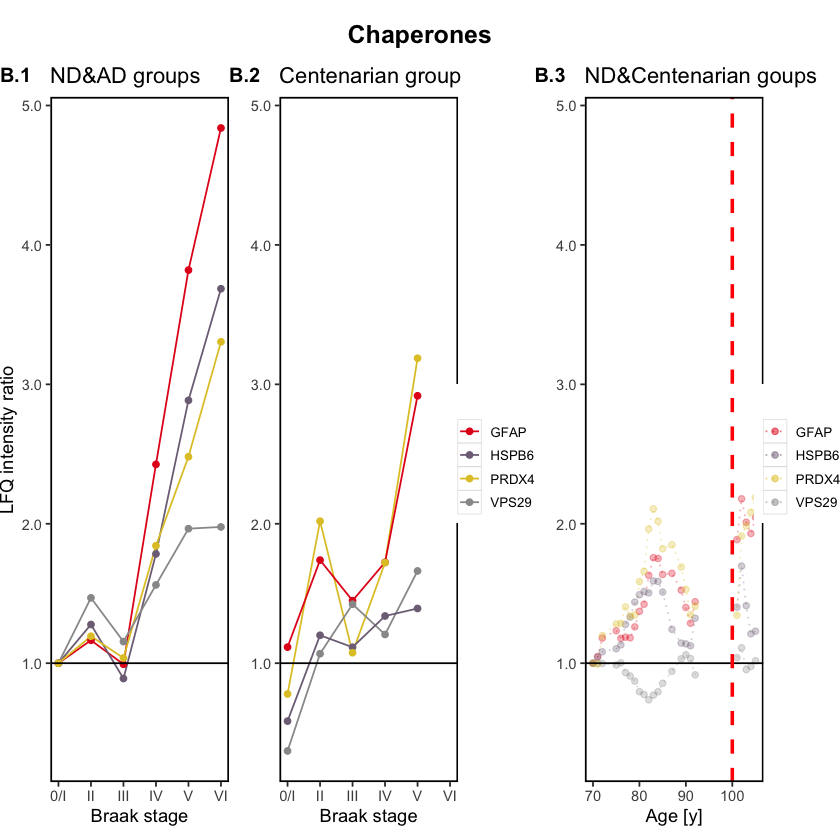

In [40]:
group_list[["CHAP"]]

In [424]:
Proteasome_protein_list <- High_quality_protein_intensity_matrix$protein[grep("^PPI|^PDI",  
                                                                    High_quality_protein_intensity_matrix$protein)]
title <- c("Peptidylprolyl and protein disulfide isomerase")
#jpeg("100_plus_plots/proteomics/protein_group_in_paper/Guus_Proteasome.jpg", 
#     width = 10, height = 5, units = 'in', res = 300)
#plot_list[["PPI"]] <- group_protein_plot(Proteasome_protein_list, title)
#plot_list_age[["PPI"]] <- group_protein_age_plot(Proteasome_protein_list, title)
#dev.off()

Braak_res_df <- generate_Braak_protein_df(Proteasome_protein_list)
Braak_res_CHCdf <- generate_Braak_protein_CHCdf(Proteasome_protein_list, Braak_res_df$exps_at_stage_NDAD)
age_res_df <- generate_age_protein_df(Proteasome_protein_list)

ymin <- min(Braak_res_df$ylim1, age_res_df$ylim1, Braak_res_CHCdf$ylim1)
ymax <- max(Braak_res_df$ylim2, age_res_df$ylim2, Braak_res_CHCdf$ylim2)

plot_list[["PPI"]] <- make_Braak_plot(Proteasome_protein_list, title, Braak_res_df$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_df$is_sig_linet, Braak_res_df$is_sig_alpha, ymin, ymax)
plot_list_CHC[["PPI"]] <- make_Braak_CHCplot(Proteasome_protein_list, title, Braak_res_CHCdf$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_CHCdf$is_sig_linet, Braak_res_CHCdf$is_sig_alpha, ymin, ymax)
plot_list_age[["PPI"]] <- make_age_plot(Proteasome_protein_list, title, age_res_df$plot_df, Braak_res_df$order_idx, 
                                       age_res_df$is_sig_linet, age_res_df$is_sig_alpha, ymin, ymax)

In [425]:
legend1 <- get_legend(plot_list[["PPI"]])
legend2 <- get_legend(plot_list_age[["PPI"]])
title <- ggdraw() + 
  draw_label(
    title,
    fontface = 'bold',
    size = title_size,
    hjust = 0.5
  )

group_list[["PPI"]] <- plot_grid(
    title, 
    plot_grid(plot_list[["PPI"]] + theme(legend.position = "none"),
          plot_list_CHC[["PPI"]] + theme(legend.position = "none"), legend1,
          plot_list_age[["PPI"]] + theme(legend.position = "none"), legend2,
          label_size = 12, labels = c(paste(LETTERS[index], 1:2, sep="."), "", 
                                      paste(LETTERS[index], 3, sep="."), ""), hjust = 0, vjust = 1,
          ncol = 5, rel_widths = rel_width_fract, align = "h", axis = "lrtb"), 
    ncol = 1,
    rel_heights = rel_height_fract)
index <- index + 1

In [426]:
PSMA_protein_list <- c("PSMA1", "PSMA2", "PSMA3", "PSMA4", "PSMA5", "PSMA6", 
                             "PSMB1", "PSMB2", "PSMB3", "PSMB4", "PSMB6", 
                             "PSME1", "PSME2", "PSME3")
#Proteasome_protein_list <- High_quality_protein_intensity_matrix$protein[grep("^PSM",  
#                                                                    High_quality_protein_intensity_matrix$protein)]
title <- c("Proteasome")
#jpeg("100_plus_plots/proteomics/protein_group_in_paper/Guus_Proteasome.jpg", 
#     width = 10, height = 5, units = 'in', res = 300)
#plot_list[["PSM"]] <- group_protein_plot(PSMA_protein_list, title)
#plot_list_age[["PSM"]] <- group_protein_age_plot(PSMA_protein_list, title)
#dev.off()

Braak_res_df <- generate_Braak_protein_df(PSMA_protein_list)
Braak_res_CHCdf <- generate_Braak_protein_CHCdf(PSMA_protein_list, Braak_res_df$exps_at_stage_NDAD)
age_res_df <- generate_age_protein_df(PSMA_protein_list)

ymin <- min(Braak_res_df$ylim1, age_res_df$ylim1, Braak_res_CHCdf$ylim1)
ymax <- max(Braak_res_df$ylim2, age_res_df$ylim2, Braak_res_CHCdf$ylim2)

plot_list[["PSM"]] <- make_Braak_plot(PSMA_protein_list, title, Braak_res_df$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_df$is_sig_linet, Braak_res_df$is_sig_alpha, ymin, ymax)
plot_list_CHC[["PSM"]] <- make_Braak_CHCplot(PSMA_protein_list, title, Braak_res_CHCdf$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_CHCdf$is_sig_linet, Braak_res_CHCdf$is_sig_alpha, ymin, ymax)
plot_list_age[["PSM"]] <- make_age_plot(PSMA_protein_list, title, age_res_df$plot_df, Braak_res_df$order_idx, 
                                       age_res_df$is_sig_linet, age_res_df$is_sig_alpha, ymin, ymax)

In [427]:
legend1 <- get_legend(plot_list[["PSM"]])
legend2 <- get_legend(plot_list_age[["PSM"]])
title <- ggdraw() + 
  draw_label(
    title,
    fontface = 'bold',
    size = title_size,
    hjust = 0.5
  )

group_list[["PSM"]] <- plot_grid(
    title, 
    plot_grid(plot_list[["PSM"]] + theme(legend.position = "none"),
          plot_list_CHC[["PSM"]] + theme(legend.position = "none"), legend1,
          plot_list_age[["PSM"]] + theme(legend.position = "none"), legend2,
          label_size = 12, labels = c(paste(LETTERS[index], 1:2, sep="."), "", 
                                      paste(LETTERS[index], 3, sep="."), ""), hjust = 0, vjust = 1,
          ncol = 5, rel_widths = rel_width_fract, align = "h", axis = "lrtb"), 
    ncol = 1,
    rel_heights = rel_height_fract)
index <- index + 1

In [428]:
TUB_proteins_list <- High_quality_protein_intensity_matrix$protein[grep("^TUB",  
                                                                    High_quality_protein_intensity_matrix$protein)]
TUB_proteins_list <- TUB_proteins_list[-grep(";", TUB_proteins_list)]
title <- c("Tubulins")
#jpeg("100_plus_plots/proteomics/protein_group_in_paper/Guus_Tubulins.jpg", 
#     width = 5, height = 5, units = 'in', res = 300)
#plot_list[["TUB"]] <- group_protein_plot(TUB_proteins_list, title)
#plot_list_age[["TUB"]] <- group_protein_age_plot(TUB_proteins_list, title)
#dev.off()

Braak_res_df <- generate_Braak_protein_df(TUB_proteins_list)
Braak_res_CHCdf <- generate_Braak_protein_CHCdf(TUB_proteins_list, Braak_res_df$exps_at_stage_NDAD)
age_res_df <- generate_age_protein_df(TUB_proteins_list)

ymin <- min(Braak_res_df$ylim1, age_res_df$ylim1, Braak_res_CHCdf$ylim1)
ymax <- max(Braak_res_df$ylim2, age_res_df$ylim2, Braak_res_CHCdf$ylim2)

plot_list[["TUB"]] <- make_Braak_plot(TUB_proteins_list, title, Braak_res_df$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_df$is_sig_linet, Braak_res_df$is_sig_alpha, ymin, ymax)
plot_list_CHC[["TUB"]] <- make_Braak_CHCplot(TUB_proteins_list, title, Braak_res_CHCdf$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_CHCdf$is_sig_linet, Braak_res_CHCdf$is_sig_alpha, ymin, ymax)
plot_list_age[["TUB"]] <- make_age_plot(TUB_proteins_list, title, age_res_df$plot_df, Braak_res_df$order_idx, 
                                       age_res_df$is_sig_linet, age_res_df$is_sig_alpha, ymin, ymax)

In [429]:
legend1 <- get_legend(plot_list[["TUB"]])
legend2 <- get_legend(plot_list_age[["TUB"]])
title <- ggdraw() + 
  draw_label(
    title,
    fontface = 'bold',
    size = title_size,
    hjust = 0.5
  )

group_list[["TUB"]] <- plot_grid(
    title, 
    plot_grid(plot_list[["TUB"]] + theme(legend.position = "none"),
          plot_list_CHC[["TUB"]] + theme(legend.position = "none"), legend1,
          plot_list_age[["TUB"]] + theme(legend.position = "none"), legend2,
          label_size = 12, labels = c(paste(LETTERS[index], 1:2, sep="."), "", 
                                      paste(LETTERS[index], 3, sep="."), ""), hjust = 0, vjust = 1,
          ncol = 5, rel_widths = rel_width_fract, align = "h", axis = "lrtb"), 
    ncol = 1,
    rel_heights = rel_height_fract)
index <- index + 1

In [430]:
#MAP_proteins_list <- High_quality_protein_intensity_matrix$protein[grep("^MAP[^K]",  
#                                                                    High_quality_protein_intensity_matrix$protein)]
#MAP_proteins_list <- MAP_proteins_list[-grep(";", MAP_proteins_list)]
MAP_proteins_list <- c("MAPT", "MAP4", "MAPRE1", "MAP1LC3A", "MAPRE2", "MAP1S", "MAP6", 
                       "MAP1A", "MAP2", "MAP7D1", "MAPRE3", "MAP1B")
title <- c("Microtubule-associated proteins")
#jpeg("100_plus_plots/proteomics/protein_group_in_paper/Guus_MAP.jpg", 
#     width = 6, height = 5, units = 'in', res = 300)
#plot_list[["MAP"]] <- group_protein_plot(MAP_proteins_list, title)
#plot_list_age[["MAP"]] <- group_protein_age_plot(MAP_proteins_list, title)
#dev.off()

Braak_res_df <- generate_Braak_protein_df(MAP_proteins_list)
Braak_res_CHCdf <- generate_Braak_protein_CHCdf(MAP_proteins_list, Braak_res_df$exps_at_stage_NDAD)
age_res_df <- generate_age_protein_df(MAP_proteins_list)

ymin <- min(Braak_res_df$ylim1, age_res_df$ylim1, Braak_res_CHCdf$ylim1)
ymax <- max(Braak_res_df$ylim2, age_res_df$ylim2, Braak_res_CHCdf$ylim2)

plot_list[["MAP"]] <- make_Braak_plot(MAP_proteins_list, title, Braak_res_df$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_df$is_sig_linet, Braak_res_df$is_sig_alpha, ymin, ymax)
plot_list_CHC[["MAP"]] <- make_Braak_CHCplot(MAP_proteins_list, title, Braak_res_CHCdf$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_CHCdf$is_sig_linet, Braak_res_CHCdf$is_sig_alpha, ymin, ymax)
plot_list_age[["MAP"]] <- make_age_plot(MAP_proteins_list, title, age_res_df$plot_df, Braak_res_df$order_idx, 
                                       age_res_df$is_sig_linet, age_res_df$is_sig_alpha, ymin, ymax)

In [431]:
legend1 <- get_legend(plot_list[["MAP"]])
legend2 <- get_legend(plot_list_age[["MAP"]])
title <- ggdraw() + 
  draw_label(
    title,
    fontface = 'bold',
    size = title_size,
    hjust = 0.5
  )

group_list[["MAP"]] <- plot_grid(
    title, 
    plot_grid(plot_list[["MAP"]] + theme(legend.position = "none"),
          plot_list_CHC[["MAP"]] + theme(legend.position = "none"), legend1,
          plot_list_age[["MAP"]] + theme(legend.position = "none"), legend2,
          label_size = 12, labels = c(paste(LETTERS[index], 1:2, sep="."), "", 
                                      paste(LETTERS[index], 3, sep="."), ""), hjust = 0, vjust = 1,
          ncol = 5, rel_widths = rel_width_fract, align = "h", axis = "lrtb"), 
    ncol = 1,
    rel_heights = rel_height_fract)
index <- index + 1

In [432]:
### I really want not include this one!
#
#KIF_proteins_list <- High_quality_protein_intensity_matrix$protein[grep("^KIF",  
#                                                                    High_quality_protein_intensity_matrix$protein)]
#KIF_proteins_list <- KIF_proteins_list[-grep(";", KIF_proteins_list)]
##DYN_proteins_list <- High_quality_protein_intensity_matrix$protein[grep("^DYN",  
##                                                                    High_quality_protein_intensity_matrix$protein)]
##DYN_proteins_list <- DYN_proteins_list[-grep(";", DYN_proteins_list)]
##KIF_DYN_proteins <- c(KIF_proteins_list, DYN_proteins_list)
#title <- c("Kinesin motors")
##jpeg("100_plus_plots/proteomics/protein_group_in_paper/Guus_MAP.jpg", 
##     width = 6, height = 5, units = 'in', res = 300)
##plot_list[["KIF"]] <- 
#group_protein_plot(KIF_proteins_list, title)
#group_protein_age_plot(KIF_proteins_list, title)
##dev.off()

In [433]:
ACT_proteins_list <- High_quality_protein_intensity_matrix$protein[grep("^ACT",  
                                                                    High_quality_protein_intensity_matrix$protein)]
ACT_proteins_list <- ACT_proteins_list[-grep(";", ACT_proteins_list)]
#ACT_proteins_list <- setdiff(ACT_proteins_list, c("ACTBL2"))
title <- c("Actin filaments")
#jpeg("100_plus_plots/proteomics/protein_group_in_paper/Guus_MAP.jpg", 
#     width = 6, height = 5, units = 'in', res = 300)
#plot_list[["ACT"]] <- group_protein_plot(ACT_proteins_list, title)
#plot_list_age[["ACT"]] <- group_protein_age_plot(ACT_proteins_list, title)
#dev.off()

Braak_res_df <- generate_Braak_protein_df(ACT_proteins_list)
Braak_res_CHCdf <- generate_Braak_protein_CHCdf(ACT_proteins_list, Braak_res_df$exps_at_stage_NDAD)
age_res_df <- generate_age_protein_df(ACT_proteins_list)

ymin <- min(Braak_res_df$ylim1, age_res_df$ylim1, Braak_res_CHCdf$ylim1)
ymax <- max(Braak_res_df$ylim2, age_res_df$ylim2, Braak_res_CHCdf$ylim2)

plot_list[["ACT"]] <- make_Braak_plot(ACT_proteins_list, title, Braak_res_df$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_df$is_sig_linet, Braak_res_df$is_sig_alpha, ymin, ymax)
plot_list_CHC[["ACT"]] <- make_Braak_CHCplot(ACT_proteins_list, title, Braak_res_CHCdf$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_CHCdf$is_sig_linet, Braak_res_CHCdf$is_sig_alpha, ymin, ymax)
plot_list_age[["ACT"]] <- make_age_plot(ACT_proteins_list, title, age_res_df$plot_df, Braak_res_df$order_idx, 
                                       age_res_df$is_sig_linet, age_res_df$is_sig_alpha, ymin, ymax)

In [434]:
legend1 <- get_legend(plot_list[["ACT"]])
legend2 <- get_legend(plot_list_age[["ACT"]])
title <- ggdraw() + 
  draw_label(
    title,
    fontface = 'bold',
    size = title_size,
    hjust = 0.5
  )

group_list[["ACT"]] <- plot_grid(
    title, 
    plot_grid(plot_list[["ACT"]] + theme(legend.position = "none"),
          plot_list_CHC[["ACT"]] + theme(legend.position = "none"), legend1,
          plot_list_age[["ACT"]] + theme(legend.position = "none"), legend2,
          label_size = 12, labels = c(paste(LETTERS[index], 1:2, sep="."), "", 
                                      paste(LETTERS[index], 3, sep="."), ""), hjust = 0, vjust = 1,
          ncol = 5, rel_widths = rel_width_fract, align = "h", axis = "lrtb"), 
    ncol = 1,
    rel_heights = rel_height_fract)
index <- index + 1

In [435]:
IF_proteins_list <- c("GFAP", "VIM", "PRPH;VIM", "SYNM", "NEFH", "NEFL", "NEFM", "INA")
title <- c("Intermediate filaments")
#jpeg("100_plus_plots/proteomics/protein_group_in_paper/Guus_MAP.jpg", 
#     width = 6, height = 5, units = 'in', res = 300)
#plot_list[["IF"]] <- group_protein_plot(IF_proteins_list, title)
#plot_list_age[["IF"]] <- group_protein_age_plot(IF_proteins_list, title)
#dev.off()

Braak_res_df <- generate_Braak_protein_df(IF_proteins_list)
Braak_res_CHCdf <- generate_Braak_protein_CHCdf(IF_proteins_list, Braak_res_df$exps_at_stage_NDAD)
age_res_df <- generate_age_protein_df(IF_proteins_list)

ymin <- min(Braak_res_df$ylim1, age_res_df$ylim1, Braak_res_CHCdf$ylim1)
ymax <- max(Braak_res_df$ylim2, age_res_df$ylim2, Braak_res_CHCdf$ylim2)

plot_list[["IF"]] <- make_Braak_plot(IF_proteins_list, title, Braak_res_df$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_df$is_sig_linet, Braak_res_df$is_sig_alpha, ymin, ymax)
plot_list_CHC[["IF"]] <- make_Braak_CHCplot(IF_proteins_list, title, Braak_res_CHCdf$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_CHCdf$is_sig_linet, Braak_res_CHCdf$is_sig_alpha, ymin, ymax)
plot_list_age[["IF"]] <- make_age_plot(IF_proteins_list, title, age_res_df$plot_df, Braak_res_df$order_idx, 
                                       age_res_df$is_sig_linet, age_res_df$is_sig_alpha, ymin, ymax)

In [436]:
legend1 <- get_legend(plot_list[["IF"]])
legend2 <- get_legend(plot_list_age[["IF"]])
title <- ggdraw() + 
  draw_label(
    title,
    fontface = 'bold',
    size = title_size,
    hjust = 0.5
  )

group_list[["IF"]] <- plot_grid(
    title, 
    plot_grid(plot_list[["IF"]] + theme(legend.position = "none"),
          plot_list_CHC[["IF"]] + theme(legend.position = "none"), legend1,
          plot_list_age[["IF"]] + theme(legend.position = "none"), legend2,
          label_size = 12, labels = c(paste(LETTERS[index], 1:2, sep="."), "", 
                                      paste(LETTERS[index], 3, sep="."), ""), hjust = 0, vjust = 1,
          ncol = 5, rel_widths = rel_width_fract, align = "h", axis = "lrtb"), 
    ncol = 1,
    rel_heights = rel_height_fract)
index <- index + 1

In [437]:
MTFF_proteins_list <- c("FIS1", "MFF", "MFN2", "DNM1", "DNM2", "OPA1", "GDAP1", "SLC25A46")
title <- c("Mitochondrial fission and fusion")
#jpeg("100_plus_plots/proteomics/protein_group_in_paper/Guus_MAP.jpg", 
#     width = 6, height = 5, units = 'in', res = 300)
#plot_list[["MTFF"]] <- group_protein_plot(MTFF_proteins_list, title)
#plot_list_age[["MTFF"]] <- group_protein_age_plot(MTFF_proteins_list, title)
#dev.off()

Braak_res_df <- generate_Braak_protein_df(MTFF_proteins_list)
Braak_res_CHCdf <- generate_Braak_protein_CHCdf(MTFF_proteins_list, Braak_res_df$exps_at_stage_NDAD)
age_res_df <- generate_age_protein_df(MTFF_proteins_list)

ymin <- min(Braak_res_df$ylim1, age_res_df$ylim1, Braak_res_CHCdf$ylim1)
ymax <- max(Braak_res_df$ylim2, age_res_df$ylim2, Braak_res_CHCdf$ylim2)

plot_list[["MTFF"]] <- make_Braak_plot(MTFF_proteins_list, title, Braak_res_df$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_df$is_sig_linet, Braak_res_df$is_sig_alpha, ymin, ymax)
plot_list_CHC[["MTFF"]] <- make_Braak_CHCplot(MTFF_proteins_list, title, Braak_res_CHCdf$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_CHCdf$is_sig_linet, Braak_res_CHCdf$is_sig_alpha, ymin, ymax)
plot_list_age[["MTFF"]] <- make_age_plot(MTFF_proteins_list, title, age_res_df$plot_df, Braak_res_df$order_idx, 
                                       age_res_df$is_sig_linet, age_res_df$is_sig_alpha, ymin, ymax)

In [438]:
legend1 <- get_legend(plot_list[["MTFF"]])
legend2 <- get_legend(plot_list_age[["MTFF"]])
title <- ggdraw() + 
  draw_label(
    title,
    fontface = 'bold',
    size = title_size,
    hjust = 0.5
  )

group_list[["MTFF"]] <- plot_grid(
    title, 
    plot_grid(plot_list[["MTFF"]] + theme(legend.position = "none"),
          plot_list_CHC[["MTFF"]] + theme(legend.position = "none"), legend1,
          plot_list_age[["MTFF"]] + theme(legend.position = "none"), legend2,
          label_size = 12, labels = c(paste(LETTERS[index], 1:2, sep="."), "", 
                                      paste(LETTERS[index], 3, sep="."), ""), hjust = 0, vjust = 1,
          ncol = 5, rel_widths = rel_width_fract, align = "h", axis = "lrtb"), 
    ncol = 1,
    rel_heights = rel_height_fract)
index <- index + 1

In [439]:
MTPM_proteins_list <- c('PDHA1','PDHB','DLAT','PDHX','MPC2','DLD','PDK2','PDK1','PDK3','PDP1')
title <- c("Mitochondrial pyruvate metabolism")
#jpeg("100_plus_plots/proteomics/protein_group_in_paper/Guus_MAP.jpg", 
#     width = 6, height = 5, units = 'in', res = 300)
#plot_list[["MTPM"]] <- group_protein_plot(MTPM_proteins_list, title)
#plot_list_age[["MTPM"]] <- group_protein_age_plot(MTPM_proteins_list, title)
#dev.off()

Braak_res_df <- generate_Braak_protein_df(MTPM_proteins_list)
Braak_res_CHCdf <- generate_Braak_protein_CHCdf(MTPM_proteins_list, Braak_res_df$exps_at_stage_NDAD)
age_res_df <- generate_age_protein_df(MTPM_proteins_list)

ymin <- min(Braak_res_df$ylim1, age_res_df$ylim1, Braak_res_CHCdf$ylim1)
ymax <- max(Braak_res_df$ylim2, age_res_df$ylim2, Braak_res_CHCdf$ylim2)

plot_list[["MTPM"]] <- make_Braak_plot(MTPM_proteins_list, title, Braak_res_df$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_df$is_sig_linet, Braak_res_df$is_sig_alpha, ymin, ymax)
plot_list_CHC[["MTPM"]] <- make_Braak_CHCplot(MTPM_proteins_list, title, Braak_res_CHCdf$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_CHCdf$is_sig_linet, Braak_res_CHCdf$is_sig_alpha, ymin, ymax)
plot_list_age[["MTPM"]] <- make_age_plot(MTPM_proteins_list, title, age_res_df$plot_df, Braak_res_df$order_idx, 
                                       age_res_df$is_sig_linet, age_res_df$is_sig_alpha, ymin, ymax)

In [440]:
legend1 <- get_legend(plot_list[["MTPM"]])
legend2 <- get_legend(plot_list_age[["MTPM"]])
title <- ggdraw() + 
  draw_label(
    title,
    fontface = 'bold',
    size = title_size,
    hjust = 0.5
  )

group_list[["MTPM"]] <- plot_grid(
    title, 
    plot_grid(plot_list[["MTPM"]] + theme(legend.position = "none"),
          plot_list_CHC[["MTPM"]] + theme(legend.position = "none"), legend1,
          plot_list_age[["MTPM"]] + theme(legend.position = "none"), legend2,
          label_size = 12, labels = c(paste(LETTERS[index], 1:2, sep="."), "", 
                                      paste(LETTERS[index], 3, sep="."), ""), hjust = 0, vjust = 1,
          ncol = 5, rel_widths = rel_width_fract, align = "h", axis = "lrtb"), 
    ncol = 1,
    rel_heights = rel_height_fract)
index <- index + 1

In [441]:
MITPM_proteins_list <- c('LACTB','PNPLA8','PRDX6','PGS1','PTPMT1','OSBPL1A','AGPAT5','AGPAT4','AGK','SPHK2')
title <- c("Mitochondrial Phospholipid metabolism")
#jpeg("100_plus_plots/proteomics/protein_group_in_paper/Guus_MAP.jpg", 
#     width = 6, height = 5, units = 'in', res = 300)
#plot_list[["MITPM"]] <- group_protein_plot(MITPM_proteins_list, title)
#plot_list_age[["MITPM"]] <- group_protein_age_plot(MITPM_proteins_list, title)
#dev.off()

Braak_res_df <- generate_Braak_protein_df(MITPM_proteins_list)
Braak_res_CHCdf <- generate_Braak_protein_CHCdf(MITPM_proteins_list, Braak_res_df$exps_at_stage_NDAD)
age_res_df <- generate_age_protein_df(MITPM_proteins_list)

ymin <- min(Braak_res_df$ylim1, age_res_df$ylim1, Braak_res_CHCdf$ylim1)
ymax <- max(Braak_res_df$ylim2, age_res_df$ylim2, Braak_res_CHCdf$ylim2)

plot_list[["MITPM"]] <- make_Braak_plot(MITPM_proteins_list, title, Braak_res_df$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_df$is_sig_linet, Braak_res_df$is_sig_alpha, ymin, ymax)
plot_list_CHC[["MITPM"]] <- make_Braak_CHCplot(MITPM_proteins_list, title, Braak_res_CHCdf$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_CHCdf$is_sig_linet, Braak_res_CHCdf$is_sig_alpha, ymin, ymax)
plot_list_age[["MITPM"]] <- make_age_plot(MITPM_proteins_list, title, age_res_df$plot_df, Braak_res_df$order_idx, 
                                       age_res_df$is_sig_linet, age_res_df$is_sig_alpha, ymin, ymax)

In [442]:
legend1 <- get_legend(plot_list[["MITPM"]])
legend2 <- get_legend(plot_list_age[["MITPM"]])
title <- ggdraw() + 
  draw_label(
    title,
    fontface = 'bold',
    size = title_size,
    hjust = 0.5
  )

group_list[["MITPM"]] <- plot_grid(
    title, 
    plot_grid(plot_list[["MITPM"]] + theme(legend.position = "none"),
          plot_list_CHC[["MITPM"]] + theme(legend.position = "none"), legend1,
          plot_list_age[["MITPM"]] + theme(legend.position = "none"), legend2,
          label_size = 12, labels = c(paste(LETTERS[index], 1:2, sep="."), "", 
                                      paste(LETTERS[index], 3, sep="."), ""), hjust = 0, vjust = 1,
          ncol = 5, rel_widths = rel_width_fract, align = "h", axis = "lrtb"), 
    ncol = 1,
    rel_heights = rel_height_fract)
index <- index + 1

In [443]:
## ECM

In [444]:
ECM_protein_list <- c("ACAN", "NCAN", "VCAN", "LAMA2", "LAMA5", "LAMB2", 
                      "LAMC1", "LGALS1", "COL4A1", "COL4A2", "COL6A1", "COL6A2", "COL6A3", "TNR")
title <- c("Extracellular matrix")
#jpeg("100_plus_plots/proteomics/protein_group_in_paper/Guus_ECM.jpg", 
#     width = 5, height = 5, units = 'in', res = 300)
#plot_list[["ECM"]] <- group_protein_plot(ECM_protein_list, title)
#plot_list_age[["ECM"]] <- group_protein_age_plot(ECM_protein_list, title)
#dev.off()

Braak_res_df <- generate_Braak_protein_df(ECM_protein_list)
Braak_res_CHCdf <- generate_Braak_protein_CHCdf(ECM_protein_list, Braak_res_df$exps_at_stage_NDAD)
age_res_df <- generate_age_protein_df(ECM_protein_list)

ymin <- min(Braak_res_df$ylim1, age_res_df$ylim1, Braak_res_CHCdf$ylim1)
ymax <- max(Braak_res_df$ylim2, age_res_df$ylim2, Braak_res_CHCdf$ylim2)

plot_list[["ECM"]] <- make_Braak_plot(ECM_protein_list, title, Braak_res_df$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_df$is_sig_linet, Braak_res_df$is_sig_alpha, ymin, ymax)
plot_list_CHC[["ECM"]] <- make_Braak_CHCplot(ECM_protein_list, title, Braak_res_CHCdf$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_CHCdf$is_sig_linet, Braak_res_CHCdf$is_sig_alpha, ymin, ymax)
plot_list_age[["ECM"]] <- make_age_plot(ECM_protein_list, title, age_res_df$plot_df, Braak_res_df$order_idx, 
                                       age_res_df$is_sig_linet, age_res_df$is_sig_alpha, ymin, ymax)

In [445]:
legend1 <- get_legend(plot_list[["ECM"]])
legend2 <- get_legend(plot_list_age[["ECM"]])
title <- ggdraw() + 
  draw_label(
    title,
    fontface = 'bold',
    size = title_size,
    hjust = 0.5
  )

group_list[["ECM"]] <- plot_grid(
    title, 
    plot_grid(plot_list[["ECM"]] + theme(legend.position = "none"),
          plot_list_CHC[["ECM"]] + theme(legend.position = "none"), legend1,
          plot_list_age[["ECM"]] + theme(legend.position = "none"), legend2,
          label_size = 12, labels = c(paste(LETTERS[index], 1:2, sep="."), "", 
                                      paste(LETTERS[index], 3, sep="."), ""), hjust = 0, vjust = 1,
          ncol = 5, rel_widths = rel_width_fract, align = "h", axis = "lrtb"), 
    ncol = 1,
    rel_heights = rel_height_fract)
index <- index + 1

In [446]:
CD_ECM_protein_list <- High_quality_protein_intensity_matrix$protein[grep("^CD[[:digit:]]", 
                        High_quality_protein_intensity_matrix$protein)]
#CD_ECM_protein_list <- CD_ECM_protein_list[-grep(";", CD_ECM_protein_list)]
title <- c("Cluster of differentiation to ECM")
#jpeg("100_plus_plots/proteomics/protein_group_in_paper/Guus_AdhesiontoECM.jpg", 
#     width = 5, height = 5, units = 'in', res = 300)
#plot_list[["ADH"]] <- group_protein_plot(CD_ECM_protein_list, title)
#plot_list_age[["ADH"]] <- group_protein_age_plot(CD_ECM_protein_list, title)
#dev.off()

Braak_res_df <- generate_Braak_protein_df(CD_ECM_protein_list)
Braak_res_CHCdf <- generate_Braak_protein_CHCdf(CD_ECM_protein_list, Braak_res_df$exps_at_stage_NDAD)
age_res_df <- generate_age_protein_df(CD_ECM_protein_list)

ymin <- min(Braak_res_df$ylim1, age_res_df$ylim1, Braak_res_CHCdf$ylim1)
ymax <- max(Braak_res_df$ylim2, age_res_df$ylim2, Braak_res_CHCdf$ylim2)

plot_list[["CD_ECM"]] <- make_Braak_plot(CD_ECM_protein_list, title, Braak_res_df$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_df$is_sig_linet, Braak_res_df$is_sig_alpha, ymin, ymax)
plot_list_CHC[["CD_ECM"]] <- make_Braak_CHCplot(CD_ECM_protein_list, title, Braak_res_CHCdf$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_CHCdf$is_sig_linet, Braak_res_CHCdf$is_sig_alpha, ymin, ymax)
plot_list_age[["CD_ECM"]] <- make_age_plot(CD_ECM_protein_list, title, age_res_df$plot_df, Braak_res_df$order_idx, 
                                       age_res_df$is_sig_linet, age_res_df$is_sig_alpha, ymin, ymax)

In [447]:
legend1 <- get_legend(plot_list[["CD_ECM"]])
legend2 <- get_legend(plot_list_age[["CD_ECM"]])
title <- ggdraw() + 
  draw_label(
    title,
    fontface = 'bold',
    size = title_size,
    hjust = 0.5
  )

group_list[["CD_ECM"]] <- plot_grid(
    title, 
    plot_grid(plot_list[["CD_ECM"]] + theme(legend.position = "none"),
          plot_list_CHC[["CD_ECM"]] + theme(legend.position = "none"), legend1,
          plot_list_age[["CD_ECM"]] + theme(legend.position = "none"), legend2,
          label_size = 12, labels = c(paste(LETTERS[index], 1:2, sep="."), "", 
                                      paste(LETTERS[index], 3, sep="."), ""), hjust = 0, vjust = 1,
          ncol = 5, rel_widths = rel_width_fract, align = "h", axis = "lrtb"), 
    ncol = 1,
    rel_heights = rel_height_fract)
index <- index + 1

In [448]:
adh_ECM_protein_list <- High_quality_protein_intensity_matrix$protein[grep("CAM", 
                        High_quality_protein_intensity_matrix$protein)]
adh_ECM_protein_list <- adh_ECM_protein_list[-grep("^CAM|;", adh_ECM_protein_list)]
title <- c("Cell adhesion molecule to ECM")
#jpeg("100_plus_plots/proteomics/protein_group_in_paper/Guus_AdhesiontoECM.jpg", 
#     width = 5, height = 5, units = 'in', res = 300)
#plot_list[["CD"]] <- group_protein_plot(adh_ECM_protein_list, title)
#plot_list_age[["CD"]] <- group_protein_age_plot(adh_ECM_protein_list, title)
#dev.off()

Braak_res_df <- generate_Braak_protein_df(adh_ECM_protein_list)
Braak_res_CHCdf <- generate_Braak_protein_CHCdf(adh_ECM_protein_list, Braak_res_df$exps_at_stage_NDAD)
age_res_df <- generate_age_protein_df(adh_ECM_protein_list)

ymin <- min(Braak_res_df$ylim1, age_res_df$ylim1, Braak_res_CHCdf$ylim1)
ymax <- max(Braak_res_df$ylim2, age_res_df$ylim2, Braak_res_CHCdf$ylim2)

plot_list[["ADH_ECM"]] <- make_Braak_plot(adh_ECM_protein_list, title, Braak_res_df$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_df$is_sig_linet, Braak_res_df$is_sig_alpha, ymin, ymax)
plot_list_CHC[["ADH_ECM"]] <- make_Braak_CHCplot(adh_ECM_protein_list, title, Braak_res_CHCdf$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_CHCdf$is_sig_linet, Braak_res_CHCdf$is_sig_alpha, ymin, ymax)
plot_list_age[["ADH_ECM"]] <- make_age_plot(adh_ECM_protein_list, title, age_res_df$plot_df, Braak_res_df$order_idx, 
                                       age_res_df$is_sig_linet, age_res_df$is_sig_alpha, ymin, ymax)

In [449]:
legend1 <- get_legend(plot_list[["ADH_ECM"]])
legend2 <- get_legend(plot_list_age[["ADH_ECM"]])
title <- ggdraw() + 
  draw_label(
    title,
    fontface = 'bold',
    size = title_size,
    hjust = 0.5
  )

group_list[["ADH_ECM"]] <- plot_grid(
    title, 
    plot_grid(plot_list[["ADH_ECM"]] + theme(legend.position = "none"),
          plot_list_CHC[["ADH_ECM"]] + theme(legend.position = "none"), legend1,
          plot_list_age[["ADH_ECM"]] + theme(legend.position = "none"), legend2,
          label_size = 12, labels = c(paste(LETTERS[index], 1:2, sep="."), "", 
                                      paste(LETTERS[index], 3, sep="."), ""), hjust = 0, vjust = 1,
          ncol = 5, rel_widths = rel_width_fract, align = "h", axis = "lrtb"), 
    ncol = 1,
    rel_heights = rel_height_fract)
index <- index + 1

In [450]:
## Presynapse

In [451]:
Synaptic_protein_list <- c("BSN", "RIMS1", "SNAP25", "STX1A", "UNC13A")
title <- c("Presynaptic scaffold")
#jpeg("100_plus_plots/proteomics/protein_group_in_paper/Guus_Synaptic_scaffold.jpg", 
#     width = 5, height = 5, units = 'in', res = 300)
#plot_list[["PRESYP"]] <- group_protein_plot(Synaptic_protein_list, title)
#plot_list_age[["PRESYP"]] <- group_protein_age_plot(Synaptic_protein_list, title)
#dev.off()

Braak_res_df <- generate_Braak_protein_df(Synaptic_protein_list)
Braak_res_CHCdf <- generate_Braak_protein_CHCdf(Synaptic_protein_list, Braak_res_df$exps_at_stage_NDAD)
age_res_df <- generate_age_protein_df(Synaptic_protein_list)

ymin <- min(Braak_res_df$ylim1, age_res_df$ylim1, Braak_res_CHCdf$ylim1)
ymax <- max(Braak_res_df$ylim2, age_res_df$ylim2, Braak_res_CHCdf$ylim2)

plot_list[["PRESYP"]] <- make_Braak_plot(Synaptic_protein_list, title, Braak_res_df$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_df$is_sig_linet, Braak_res_df$is_sig_alpha, ymin, ymax)
plot_list_CHC[["PRESYP"]] <- make_Braak_CHCplot(Synaptic_protein_list, title, Braak_res_CHCdf$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_CHCdf$is_sig_linet, Braak_res_CHCdf$is_sig_alpha, ymin, ymax)
plot_list_age[["PRESYP"]] <- make_age_plot(Synaptic_protein_list, title, age_res_df$plot_df, Braak_res_df$order_idx, 
                                       age_res_df$is_sig_linet, age_res_df$is_sig_alpha, ymin, ymax)

In [452]:
legend1 <- get_legend(plot_list[["PRESYP"]])
legend2 <- get_legend(plot_list_age[["PRESYP"]])
title <- ggdraw() + 
  draw_label(
    title,
    fontface = 'bold',
    size = title_size,
    hjust = 0.5
  )

group_list[["PRESYP"]] <- plot_grid(
    title, 
    plot_grid(plot_list[["PRESYP"]] + theme(legend.position = "none"),
          plot_list_CHC[["PRESYP"]] + theme(legend.position = "none"), legend1,
          plot_list_age[["PRESYP"]] + theme(legend.position = "none"), legend2,
          label_size = 12, labels = c(paste(LETTERS[index], 1:2, sep="."), "", 
                                      paste(LETTERS[index], 3, sep="."), ""), hjust = 0, vjust = 1,
          ncol = 5, rel_widths = rel_width_fract, align = "h", axis = "lrtb"), 
    ncol = 1,
    rel_heights = rel_height_fract)
index <- index + 1

In [453]:
vesicle_protein_list <- c("STXBP1", "SCAMP1", "SV2A", "SV2B", "SYT1", "SYNGR1", "VAMP1", "VAMP2")
title <- c("Presynaptic vesicle release")
#jpeg("100_plus_plots/proteomics/protein_group_in_paper/Guus_Synaptic_vesicle.jpg", 
#     width = 5, height = 5, units = 'in', res = 300)
#plot_list[["vesicle"]] <- group_protein_plot(vesicle_protein_list, title)
#plot_list_age[["vesicle"]] <- group_protein_age_plot(vesicle_protein_list, title)
#dev.off()

Braak_res_df <- generate_Braak_protein_df(vesicle_protein_list)
Braak_res_CHCdf <- generate_Braak_protein_CHCdf(vesicle_protein_list, Braak_res_df$exps_at_stage_NDAD)
age_res_df <- generate_age_protein_df(vesicle_protein_list)

ymin <- min(Braak_res_df$ylim1, age_res_df$ylim1, Braak_res_CHCdf$ylim1)
ymax <- max(Braak_res_df$ylim2, age_res_df$ylim2, Braak_res_CHCdf$ylim2)

plot_list[["vesicle"]] <- make_Braak_plot(vesicle_protein_list, title, Braak_res_df$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_df$is_sig_linet, Braak_res_df$is_sig_alpha, ymin, ymax)
plot_list_CHC[["vesicle"]] <- make_Braak_CHCplot(vesicle_protein_list, title, Braak_res_CHCdf$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_CHCdf$is_sig_linet, Braak_res_CHCdf$is_sig_alpha, ymin, ymax)
plot_list_age[["vesicle"]] <- make_age_plot(vesicle_protein_list, title, age_res_df$plot_df, Braak_res_df$order_idx, 
                                       age_res_df$is_sig_linet, age_res_df$is_sig_alpha, ymin, ymax)

In [454]:
legend1 <- get_legend(plot_list[["vesicle"]])
legend2 <- get_legend(plot_list_age[["vesicle"]])
title <- ggdraw() + 
  draw_label(
    title,
    fontface = 'bold',
    size = title_size,
    hjust = 0.5
  )

group_list[["vesicle"]] <- plot_grid(
    title, 
    plot_grid(plot_list[["vesicle"]] + theme(legend.position = "none"),
          plot_list_CHC[["vesicle"]] + theme(legend.position = "none"), legend1,
          plot_list_age[["vesicle"]] + theme(legend.position = "none"), legend2,
          label_size = 12, labels = c(paste(LETTERS[index], 1:2, sep="."), "", 
                                      paste(LETTERS[index], 3, sep="."), ""), hjust = 0, vjust = 1,
          ncol = 5, rel_widths = rel_width_fract, align = "h", axis = "lrtb"), 
    ncol = 1,
    rel_heights = rel_height_fract)
index <- index + 1

In [455]:
ATP6V_protein_list <- High_quality_protein_intensity_matrix$protein[grep("^ATP6V", 
                      High_quality_protein_intensity_matrix$protein)]
ATP6V_protein_list <- ATP6V_protein_list[-grep(";", ATP6V_protein_list)]
title <- c("V-ATPase")
#jpeg("100_plus_plots/proteomics/protein_group_in_paper/Guus_Synaptic_vesicle.jpg", 
#     width = 5, height = 5, units = 'in', res = 300)
#plot_list[["ATP6V"]] <- group_protein_plot(ATP6V_protein_list, title)
#plot_list_age[["ATP6V"]] <- group_protein_age_plot(ATP6V_protein_list, title)
#dev.off()

Braak_res_df <- generate_Braak_protein_df(ATP6V_protein_list)
Braak_res_CHCdf <- generate_Braak_protein_CHCdf(ATP6V_protein_list, Braak_res_df$exps_at_stage_NDAD)
age_res_df <- generate_age_protein_df(ATP6V_protein_list)

ymin <- min(Braak_res_df$ylim1, age_res_df$ylim1, Braak_res_CHCdf$ylim1)
ymax <- max(Braak_res_df$ylim2, age_res_df$ylim2, Braak_res_CHCdf$ylim2)

plot_list[["V-ATPase"]] <- make_Braak_plot(ATP6V_protein_list, title, Braak_res_df$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_df$is_sig_linet, Braak_res_df$is_sig_alpha, ymin, ymax)
plot_list_CHC[["V-ATPase"]] <- make_Braak_CHCplot(ATP6V_protein_list, title, Braak_res_CHCdf$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_CHCdf$is_sig_linet, Braak_res_CHCdf$is_sig_alpha, ymin, ymax)
plot_list_age[["V-ATPase"]] <- make_age_plot(ATP6V_protein_list, title, age_res_df$plot_df, Braak_res_df$order_idx, 
                                       age_res_df$is_sig_linet, age_res_df$is_sig_alpha, ymin, ymax)

In [456]:
legend1 <- get_legend(plot_list[["V-ATPase"]])
legend2 <- get_legend(plot_list_age[["V-ATPase"]])
title <- ggdraw() + 
  draw_label(
    title,
    fontface = 'bold',
    size = title_size,
    hjust = 0.5
  )

group_list[["V-ATPase"]] <- plot_grid(
    title, 
    plot_grid(plot_list[["V-ATPase"]] + theme(legend.position = "none"),
          plot_list_CHC[["V-ATPase"]] + theme(legend.position = "none"), legend1,
          plot_list_age[["V-ATPase"]] + theme(legend.position = "none"), legend2,
          label_size = 12, labels = c(paste(LETTERS[index], 1:2, sep="."), "", 
                                      paste(LETTERS[index], 3, sep="."), ""), hjust = 0, vjust = 1,
          ncol = 5, rel_widths = rel_width_fract, align = "h", axis = "lrtb"), 
    ncol = 1,
    rel_heights = rel_height_fract)
index <- index + 1

In [457]:
## Postsynapse

In [458]:
PSD_protein_list <- c("SYNGAP1", "HOMER1")
DLG_proteins_list <- High_quality_protein_intensity_matrix$protein[grep("^DLG",  
                                                                    High_quality_protein_intensity_matrix$protein)]
DLG_proteins_list <- DLG_proteins_list[-grep(";", DLG_proteins_list)]
SHANK_proteins_list <- High_quality_protein_intensity_matrix$protein[grep("^SHANK",  
                                                                    High_quality_protein_intensity_matrix$protein)]
PSD_protein_list <- c(PSD_protein_list, DLG_proteins_list, SHANK_proteins_list)
title <- c("Postsynaptic scaffold")
#jpeg("100_plus_plots/proteomics/protein_group_in_paper/Guus_Synaptic_vesicle.jpg", 
#     width = 5, height = 5, units = 'in', res = 300)
#plot_list[["PSD"]] <- group_protein_plot(PSD_protein_list, title)
#plot_list_age[["PSD"]] <- group_protein_age_plot(PSD_protein_list, title)
#dev.off()

Braak_res_df <- generate_Braak_protein_df(PSD_protein_list)
Braak_res_CHCdf <- generate_Braak_protein_CHCdf(PSD_protein_list, Braak_res_df$exps_at_stage_NDAD)
age_res_df <- generate_age_protein_df(PSD_protein_list)

ymin <- min(Braak_res_df$ylim1, age_res_df$ylim1, Braak_res_CHCdf$ylim1)
ymax <- max(Braak_res_df$ylim2, age_res_df$ylim2, Braak_res_CHCdf$ylim2)

plot_list[["PSD"]] <- make_Braak_plot(PSD_protein_list, title, Braak_res_df$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_df$is_sig_linet, Braak_res_df$is_sig_alpha, ymin, ymax)
plot_list_CHC[["PSD"]] <- make_Braak_CHCplot(PSD_protein_list, title, Braak_res_CHCdf$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_CHCdf$is_sig_linet, Braak_res_CHCdf$is_sig_alpha, ymin, ymax)
plot_list_age[["PSD"]] <- make_age_plot(PSD_protein_list, title, age_res_df$plot_df, Braak_res_df$order_idx, 
                                       age_res_df$is_sig_linet, age_res_df$is_sig_alpha, ymin, ymax)

In [459]:
legend1 <- get_legend(plot_list[["PSD"]])
legend2 <- get_legend(plot_list_age[["PSD"]])
title <- ggdraw() + 
  draw_label(
    title,
    fontface = 'bold',
    size = title_size,
    hjust = 0.5
  )

group_list[["PSD"]] <- plot_grid(
    title, 
    plot_grid(plot_list[["PSD"]] + theme(legend.position = "none"),
          plot_list_CHC[["PSD"]] + theme(legend.position = "none"), legend1,
          plot_list_age[["PSD"]] + theme(legend.position = "none"), legend2,
          label_size = 12, labels = c(paste(LETTERS[index], 1:2, sep="."), "", 
                                      paste(LETTERS[index], 3, sep="."), ""), hjust = 0, vjust = 1,
          ncol = 5, rel_widths = rel_width_fract, align = "h", axis = "lrtb"), 
    ncol = 1,
    rel_heights = rel_height_fract)
index <- index + 1

In [460]:
RECP_proteins_list <- High_quality_protein_intensity_matrix$protein[grep("^GRI",  
                                                                    High_quality_protein_intensity_matrix$protein)]
RECP_proteins_list <- RECP_proteins_list[-grep(";", RECP_proteins_list)]
RECP_proteins_list <- setdiff(RECP_proteins_list, c("GRIPAP1"))
title <- c("Ionotropic glutamate receptors")
#jpeg("100_plus_plots/proteomics/protein_group_in_paper/Guus_Synaptic_vesicle.jpg", 
#     width = 5, height = 5, units = 'in', res = 300)
#plot_list[["RECP"]] <- group_protein_plot(RECP_proteins_list, title)
#plot_list_age[["RECP"]] <- group_protein_age_plot(RECP_proteins_list, title)
#dev.off()

Braak_res_df <- generate_Braak_protein_df(RECP_proteins_list)
Braak_res_CHCdf <- generate_Braak_protein_CHCdf(RECP_proteins_list, Braak_res_df$exps_at_stage_NDAD)
age_res_df <- generate_age_protein_df(RECP_proteins_list)

ymin <- min(Braak_res_df$ylim1, age_res_df$ylim1, Braak_res_CHCdf$ylim1)
ymax <- max(Braak_res_df$ylim2, age_res_df$ylim2, Braak_res_CHCdf$ylim2)

plot_list[["RECP"]] <- make_Braak_plot(RECP_proteins_list, title, Braak_res_df$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_df$is_sig_linet, Braak_res_df$is_sig_alpha, ymin, ymax)
plot_list_CHC[["RECP"]] <- make_Braak_CHCplot(RECP_proteins_list, title, Braak_res_CHCdf$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_CHCdf$is_sig_linet, Braak_res_CHCdf$is_sig_alpha, ymin, ymax)
plot_list_age[["RECP"]] <- make_age_plot(RECP_proteins_list, title, age_res_df$plot_df, Braak_res_df$order_idx, 
                                       age_res_df$is_sig_linet, age_res_df$is_sig_alpha, ymin, ymax)

In [461]:
legend1 <- get_legend(plot_list[["RECP"]])
legend2 <- get_legend(plot_list_age[["RECP"]])
title <- ggdraw() + 
  draw_label(
    title,
    fontface = 'bold',
    size = title_size,
    hjust = 0.5
  )

group_list[["RECP"]] <- plot_grid(
    title, 
    plot_grid(plot_list[["RECP"]] + theme(legend.position = "none"),
          plot_list_CHC[["RECP"]] + theme(legend.position = "none"), legend1,
          plot_list_age[["RECP"]] + theme(legend.position = "none"), legend2,
          label_size = 12, labels = c(paste(LETTERS[index], 1:2, sep="."), "", 
                                      paste(LETTERS[index], 3, sep="."), ""), hjust = 0, vjust = 1,
          ncol = 5, rel_widths = rel_width_fract, align = "h", axis = "lrtb"), 
    ncol = 1,
    rel_heights = rel_height_fract)
index <- index + 1

In [462]:
### Not include!
#GRIA_proteins_list <- c("CACNG2", "CPT1A", "FRRS1L", "OLFM1", "OLFM2", "OLFM3", "SACM1L")
#title <- c("GRIA-associated proteins")
##jpeg("100_plus_plots/proteomics/protein_group_in_paper/Guus_Synaptic_vesicle.jpg", 
##     width = 5, height = 5, units = 'in', res = 300)
#plot_list[["GRIA"]] <- group_protein_plot(GRIA_proteins_list, title)
##dev.off()

In [463]:
## Chaperones

In [464]:
AE_protein_list <- c("PRDX1", "PRDX2",  
                       "PRDX4", "PRDX5", "PRDX6", "SOD2")
title <- c("Antioxidant enzymes")
#jpeg("100_plus_plots/proteomics/protein_group_in_paper/Guus_Antioxidant.jpg", 
#     width = 5, height = 5, units = 'in', res = 300)
#plot_list[["AE"]] <- group_protein_plot(AE_protein_list, title)
#plot_list_age[["AE"]] <- group_protein_age_plot(AE_protein_list, title)
#dev.off()

Braak_res_df <- generate_Braak_protein_df(AE_protein_list)
Braak_res_CHCdf <- generate_Braak_protein_CHCdf(AE_protein_list, Braak_res_df$exps_at_stage_NDAD)
age_res_df <- generate_age_protein_df(AE_protein_list)

ymin <- min(Braak_res_df$ylim1, age_res_df$ylim1, Braak_res_CHCdf$ylim1)
ymax <- max(Braak_res_df$ylim2, age_res_df$ylim2, Braak_res_CHCdf$ylim2)

plot_list[["AE"]] <- make_Braak_plot(AE_protein_list, title, Braak_res_df$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_df$is_sig_linet, Braak_res_df$is_sig_alpha, ymin, ymax)
plot_list_CHC[["AE"]] <- make_Braak_CHCplot(AE_protein_list, title, Braak_res_CHCdf$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_CHCdf$is_sig_linet, Braak_res_CHCdf$is_sig_alpha, ymin, ymax)
plot_list_age[["AE"]] <- make_age_plot(AE_protein_list, title, age_res_df$plot_df, Braak_res_df$order_idx, 
                                       age_res_df$is_sig_linet, age_res_df$is_sig_alpha, ymin, ymax)

In [465]:
legend1 <- get_legend(plot_list[["AE"]])
legend2 <- get_legend(plot_list_age[["AE"]])
title <- ggdraw() + 
  draw_label(
    title,
    fontface = 'bold',
    size = title_size,
    hjust = 0.5
  )

group_list[["AE"]] <- plot_grid(
    title, 
    plot_grid(plot_list[["AE"]] + theme(legend.position = "none"),
          plot_list_CHC[["AE"]] + theme(legend.position = "none"), legend1,
          plot_list_age[["AE"]] + theme(legend.position = "none"), legend2,
          label_size = 12, labels = c(paste(LETTERS[index], 1:2, sep="."), "", 
                                      paste(LETTERS[index], 3, sep="."), ""), hjust = 0, vjust = 1,
          ncol = 5, rel_widths = rel_width_fract, align = "h", axis = "lrtb"), 
    ncol = 1,
    rel_heights = rel_height_fract)
index <- index + 1

In [466]:
MOS_protein_list <- c("ALDH2", "ALDH1A1", "ALDH1L1", "ALDH3A2", "ALDH4A1", "ALDH5A1", "ALDH6A1", 
                       "ALDH7A1", "ALDH9A1", "AQP4", "MLC1")

title <- c("Metabolic/osmotic stress")
#jpeg("100_plus_plots/proteomics/protein_group_in_paper/Guus_osmotic.jpg", 
#     width = 5, height = 5, units = 'in', res = 300)
#plot_list[["MOS"]] <- group_protein_plot(MOS_protein_list, title)
#plot_list_age[["MOS"]] <- group_protein_age_plot(MOS_protein_list, title)
#dev.off()

Braak_res_df <- generate_Braak_protein_df(MOS_protein_list)
Braak_res_CHCdf <- generate_Braak_protein_CHCdf(MOS_protein_list, Braak_res_df$exps_at_stage_NDAD)
age_res_df <- generate_age_protein_df(MOS_protein_list)

ymin <- min(Braak_res_df$ylim1, age_res_df$ylim1, Braak_res_CHCdf$ylim1)
ymax <- max(Braak_res_df$ylim2, age_res_df$ylim2, Braak_res_CHCdf$ylim2)

plot_list[["MOS"]] <- make_Braak_plot(MOS_protein_list, title, Braak_res_df$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_df$is_sig_linet, Braak_res_df$is_sig_alpha, ymin, ymax)
plot_list_CHC[["MOS"]] <- make_Braak_CHCplot(MOS_protein_list, title, Braak_res_CHCdf$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_CHCdf$is_sig_linet, Braak_res_CHCdf$is_sig_alpha, ymin, ymax)
plot_list_age[["MOS"]] <- make_age_plot(MOS_protein_list, title, age_res_df$plot_df, Braak_res_df$order_idx, 
                                       age_res_df$is_sig_linet, age_res_df$is_sig_alpha, ymin, ymax)

In [467]:
legend1 <- get_legend(plot_list[["MOS"]])
legend2 <- get_legend(plot_list_age[["MOS"]])
title <- ggdraw() + 
  draw_label(
    title,
    fontface = 'bold',
    size = title_size,
    hjust = 0.5
  )

group_list[["MOS"]] <- plot_grid(
    title, 
    plot_grid(plot_list[["MOS"]] + theme(legend.position = "none"),
          plot_list_CHC[["MOS"]] + theme(legend.position = "none"), legend1,
          plot_list_age[["MOS"]] + theme(legend.position = "none"), legend2,
          label_size = 12, labels = c(paste(LETTERS[index], 1:2, sep="."), "", 
                                      paste(LETTERS[index], 3, sep="."), ""), hjust = 0, vjust = 1,
          ncol = 5, rel_widths = rel_width_fract, align = "h", axis = "lrtb"), 
    ncol = 1,
    rel_heights = rel_height_fract)
index <- index + 1

In [468]:
Myelin_proteins_list <- c("MOG", "MAG", "MBP", "PLP1", "CNP")
title <- c("Myelin")
#jpeg("100_plus_plots/proteomics/protein_group_in_paper/Guus_osmotic.jpg", 
#     width = 5, height = 5, units = 'in', res = 300)
#plot_list[["Myelin"]] <- group_protein_plot(Myelin_proteins_list, title)
#plot_list_age[["Myelin"]] <- group_protein_age_plot(Myelin_proteins_list, title)
#dev.off()

Braak_res_df <- generate_Braak_protein_df(Myelin_proteins_list)
Braak_res_CHCdf <- generate_Braak_protein_CHCdf(Myelin_proteins_list, Braak_res_df$exps_at_stage_NDAD)
age_res_df <- generate_age_protein_df(Myelin_proteins_list)

ymin <- min(Braak_res_df$ylim1, age_res_df$ylim1, Braak_res_CHCdf$ylim1)
ymax <- max(Braak_res_df$ylim2, age_res_df$ylim2, Braak_res_CHCdf$ylim2)

plot_list[["Myelin"]] <- make_Braak_plot(Myelin_proteins_list, title, Braak_res_df$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_df$is_sig_linet, Braak_res_df$is_sig_alpha, ymin, ymax)
plot_list_CHC[["Myelin"]] <- make_Braak_CHCplot(Myelin_proteins_list, title, Braak_res_CHCdf$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_CHCdf$is_sig_linet, Braak_res_CHCdf$is_sig_alpha, ymin, ymax)
plot_list_age[["Myelin"]] <- make_age_plot(Myelin_proteins_list, title, age_res_df$plot_df, Braak_res_df$order_idx, 
                                       age_res_df$is_sig_linet, age_res_df$is_sig_alpha, ymin, ymax)

In [469]:
legend1 <- get_legend(plot_list[["Myelin"]])
legend2 <- get_legend(plot_list_age[["Myelin"]])
title <- ggdraw() + 
  draw_label(
    title,
    fontface = 'bold',
    size = title_size,
    hjust = 0.5
  )

group_list[["Myelin"]] <- plot_grid(
    title, 
    plot_grid(plot_list[["Myelin"]] + theme(legend.position = "none"),
          plot_list_CHC[["Myelin"]] + theme(legend.position = "none"), legend1,
          plot_list_age[["Myelin"]] + theme(legend.position = "none"), legend2,
          label_size = 12, labels = c(paste(LETTERS[index], 1:2, sep="."), "", 
                                      paste(LETTERS[index], 3, sep="."), ""), hjust = 0, vjust = 1,
          ncol = 5, rel_widths = rel_width_fract, align = "h", axis = "lrtb"), 
    ncol = 1,
    rel_heights = rel_height_fract)
index <- index + 1

In [470]:
Retromer_proteins_list <- c("VPS26A", "VPS26B", "VPS29", "VPS35", "SNX1", "SNX2", "SNX5", "SNX27", "SORL1", "SORT1")
title <- c("Retromer related proteins")
#jpeg("100_plus_plots/proteomics/protein_group_in_paper/Guus_osmotic.jpg", 
#     width = 5, height = 5, units = 'in', res = 300)
#plot_list[["Myelin"]] <- group_protein_plot(Myelin_proteins_list, title)
#plot_list_age[["Myelin"]] <- group_protein_age_plot(Myelin_proteins_list, title)
#dev.off()

Braak_res_df <- generate_Braak_protein_df(Retromer_proteins_list)
Braak_res_CHCdf <- generate_Braak_protein_CHCdf(Retromer_proteins_list, Braak_res_df$exps_at_stage_NDAD)
age_res_df <- generate_age_protein_df(Retromer_proteins_list)

ymin <- min(Braak_res_df$ylim1, age_res_df$ylim1, Braak_res_CHCdf$ylim1)
ymax <- max(Braak_res_df$ylim2, age_res_df$ylim2, Braak_res_CHCdf$ylim2)

plot_list[["Retromer"]] <- make_Braak_plot(Retromer_proteins_list, title, Braak_res_df$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_df$is_sig_linet, Braak_res_df$is_sig_alpha, ymin, ymax)
plot_list_CHC[["Retromer"]] <- make_Braak_CHCplot(Retromer_proteins_list, title, Braak_res_CHCdf$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_CHCdf$is_sig_linet, Braak_res_CHCdf$is_sig_alpha, ymin, ymax)
plot_list_age[["Retromer"]] <- make_age_plot(Retromer_proteins_list, title, age_res_df$plot_df, Braak_res_df$order_idx, 
                                       age_res_df$is_sig_linet, age_res_df$is_sig_alpha, ymin, ymax)

In [471]:
legend1 <- get_legend(plot_list[["Retromer"]])
legend2 <- get_legend(plot_list_age[["Retromer"]])
title <- ggdraw() + 
  draw_label(
    title,
    fontface = 'bold',
    size = title_size,
    hjust = 0.5
  )

group_list[["Retromer"]] <- plot_grid(
    title, 
    plot_grid(plot_list[["Retromer"]] + theme(legend.position = "none"),
          plot_list_CHC[["Retromer"]] + theme(legend.position = "none"), legend1,
          plot_list_age[["Retromer"]] + theme(legend.position = "none"), legend2,
          label_size = 12, labels = c(paste(LETTERS[index], 1:2, sep="."), "", 
                                      paste(LETTERS[index], 3, sep="."), ""), hjust = 0, vjust = 1,
          ncol = 5, rel_widths = rel_width_fract, align = "h", axis = "lrtb"), 
    ncol = 1,
    rel_heights = rel_height_fract)
index <- index + 1

In [472]:
Recycling_proteins_list <- c("RAB7A", "STX12", "EHD1", "PICALM", "BIN1")
title <- c("Recycling endosome proteins")
#jpeg("100_plus_plots/proteomics/protein_group_in_paper/Guus_osmotic.jpg", 
#     width = 5, height = 5, units = 'in', res = 300)
#plot_list[["Myelin"]] <- group_protein_plot(Myelin_proteins_list, title)
#plot_list_age[["Myelin"]] <- group_protein_age_plot(Myelin_proteins_list, title)
#dev.off()

Braak_res_df <- generate_Braak_protein_df(Recycling_proteins_list)
Braak_res_CHCdf <- generate_Braak_protein_CHCdf(Recycling_proteins_list, Braak_res_df$exps_at_stage_NDAD)
age_res_df <- generate_age_protein_df(Recycling_proteins_list)

ymin <- min(Braak_res_df$ylim1, age_res_df$ylim1, Braak_res_CHCdf$ylim1)
ymax <- max(Braak_res_df$ylim2, age_res_df$ylim2, Braak_res_CHCdf$ylim2)

plot_list[["Recycling"]] <- make_Braak_plot(Recycling_proteins_list, title, Braak_res_df$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_df$is_sig_linet, Braak_res_df$is_sig_alpha, ymin, ymax)
plot_list_CHC[["Recycling"]] <- make_Braak_CHCplot(Recycling_proteins_list, title, Braak_res_CHCdf$plot_df, Braak_res_df$order_idx, 
                                       Braak_res_CHCdf$is_sig_linet, Braak_res_CHCdf$is_sig_alpha, ymin, ymax)
plot_list_age[["Recycling"]] <- make_age_plot(Recycling_proteins_list, title, age_res_df$plot_df, Braak_res_df$order_idx, 
                                       age_res_df$is_sig_linet, age_res_df$is_sig_alpha, ymin, ymax)

In [473]:
legend1 <- get_legend(plot_list[["Recycling"]])
legend2 <- get_legend(plot_list_age[["Recycling"]])
title <- ggdraw() + 
  draw_label(
    title,
    fontface = 'bold',
    size = title_size,
    hjust = 0.5
  )

group_list[["Recycling"]] <- plot_grid(
    title, 
    plot_grid(plot_list[["Recycling"]] + theme(legend.position = "none"),
          plot_list_CHC[["Recycling"]] + theme(legend.position = "none"), legend1,
          plot_list_age[["Recycling"]] + theme(legend.position = "none"), legend2,
          label_size = 12, labels = c(paste(LETTERS[index], 1:2, sep="."), "", 
                                      paste(LETTERS[index], 3, sep="."), ""), hjust = 0, vjust = 1,
          ncol = 5, rel_widths = rel_width_fract, align = "h", axis = "lrtb"), 
    ncol = 1,
    rel_heights = rel_height_fract)
index <- index + 1

In [151]:
group_plot <- plot_grid(plotlist = plot_list, ncol = 3, label_size = 15,
                        labels = letters[1:length(plot_list)], hjust = -1.5, vjust = 1,
                        align = "hv", axis = "tblr")

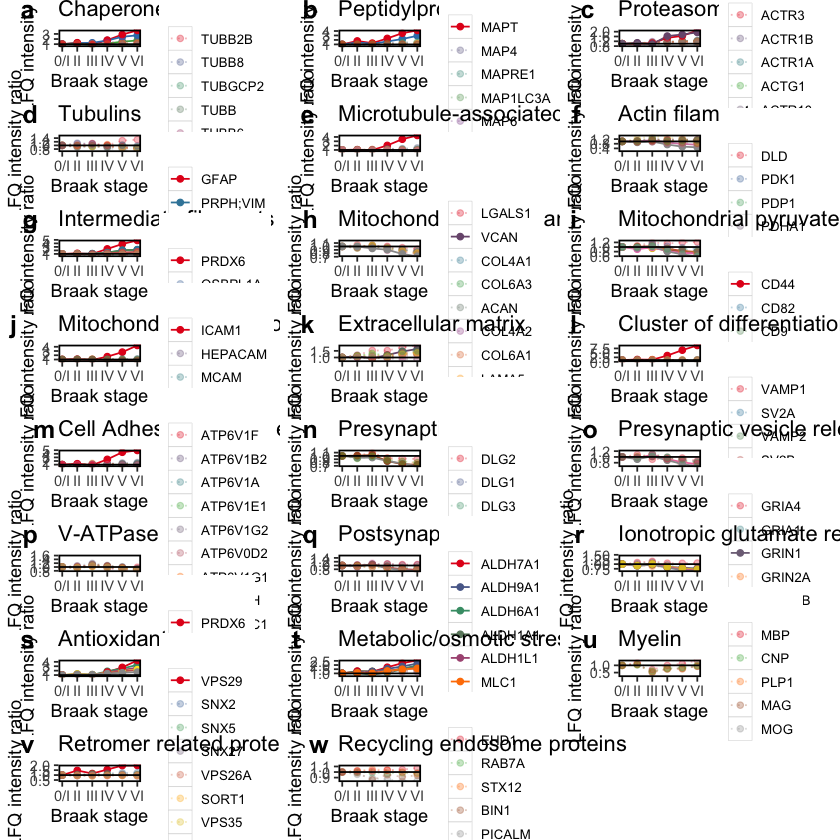

In [152]:
group_plot

In [161]:
group_plot_CHC <- plot_grid(plotlist = plot_list_CHC, ncol = 3, label_size = 15,
                        labels = letters[1:length(plot_list)], hjust = -1.5, vjust = 1,
                        align = "hv", axis = "tblr")

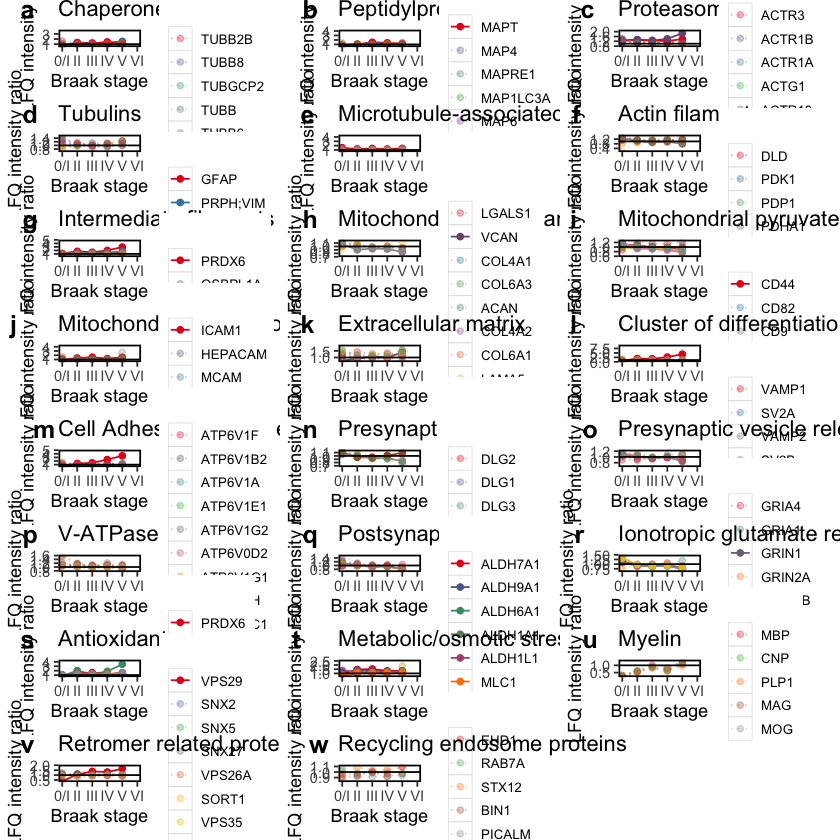

In [162]:
group_plot_CHC

In [153]:
group_plot_age <- plot_grid(plotlist = plot_list_age, ncol = 3, label_size = 15,
                        labels = letters[1:length(plot_list)], hjust = -1.5, vjust = 1,
                        align = "hv", axis = "tblr")

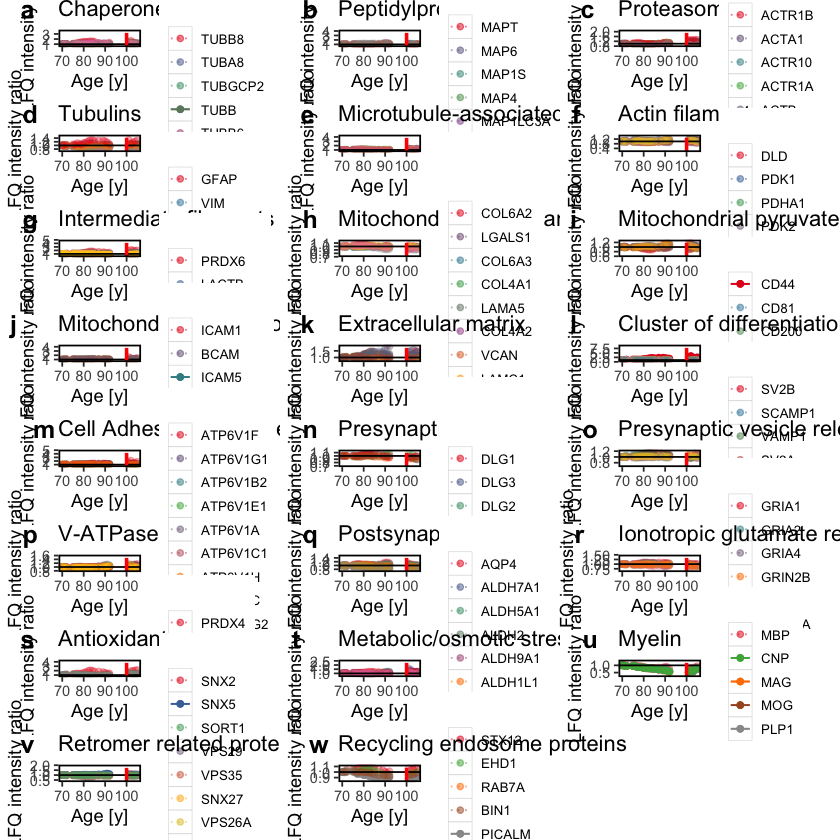

In [154]:
group_plot_age

In [155]:
save_plot("100_plus_plots/proteomics/protein_group/Protein_group_change_Braak_20221228.pdf", 
          group_plot, base_height = 21, base_width = 15)

In [163]:
save_plot("100_plus_plots/proteomics/protein_group/Protein_group_change_Braak_CHC_20221228.pdf", 
          group_plot, base_height = 21, base_width = 15)

In [156]:
save_plot("100_plus_plots/proteomics/protein_group/Protein_group_change_Age_20221228.pdf", 
          group_plot_age, base_height = 28, base_width = 18)

In [157]:
merge_plot <- NULL
labels <- NULL
for(i in 1:length(plot_list)){
    merge_plot[[i*2-1]] <- plot_list[[i]]
    labels <- c(labels, paste(letters[i], ".1", sep=""))
    merge_plot[[i*2]] <- plot_list_age[[i]]
    labels <- c(labels, paste(letters[i], ".2", sep=""))
}

In [158]:
group_plot_merge <- plot_grid(plotlist = merge_plot, ncol = 6, label_size = 12,
                        labels = labels, hjust = -0.6, vjust = 1.1,
                        align = "hv", axis = "tblr")

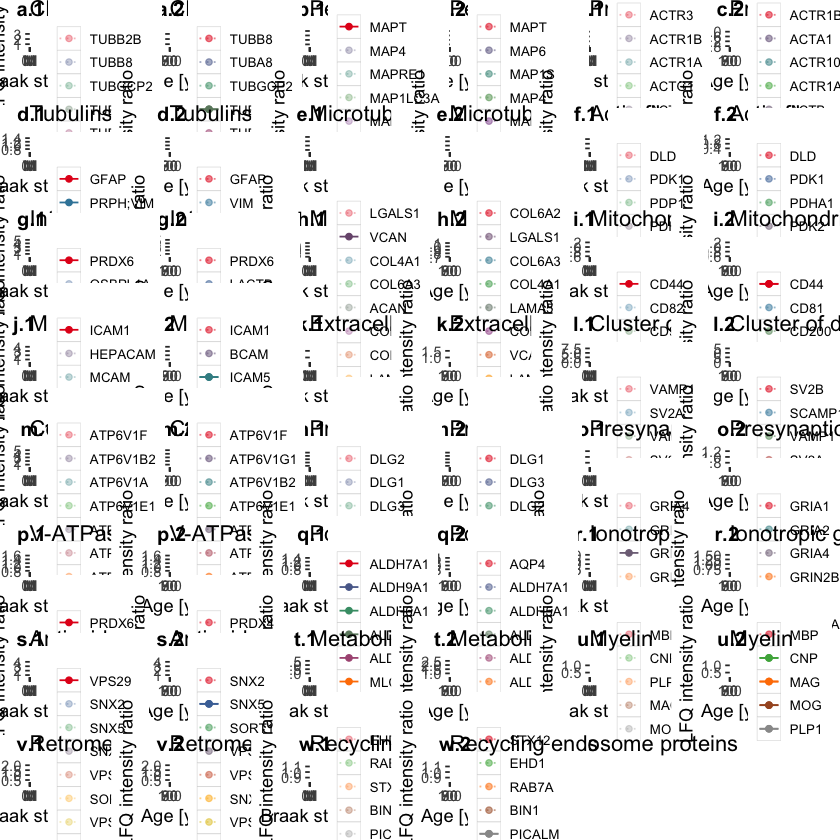

In [159]:
group_plot_merge

In [160]:
save_plot("100_plus_plots/proteomics/protein_group/Protein_group_change_merge_removeCHC_20221228.pdf", 
          group_plot_merge, base_height = 25, base_width = 28)

In [164]:
merge_plot <- NULL
labels <- NULL
for(i in 1:length(plot_list)){
    merge_plot[[i*3-2]] <- plot_list[[i]]
    labels <- c(labels, paste(LETTERS[i], ".1", sep=""))
    merge_plot[[i*3-1]] <- plot_list_CHC[[i]]
    labels <- c(labels, paste(LETTERS[i], ".2", sep=""))
    merge_plot[[i*3]] <- plot_list_age[[i]]
    labels <- c(labels, paste(LETTERS[i], ".3", sep=""))
}

In [165]:
group_plot_merge <- plot_grid(plotlist = merge_plot, ncol = 6, label_size = 12,
                        labels = labels, hjust = -0.6, vjust = 1.1,
                        align = "hv", axis = "tblr")

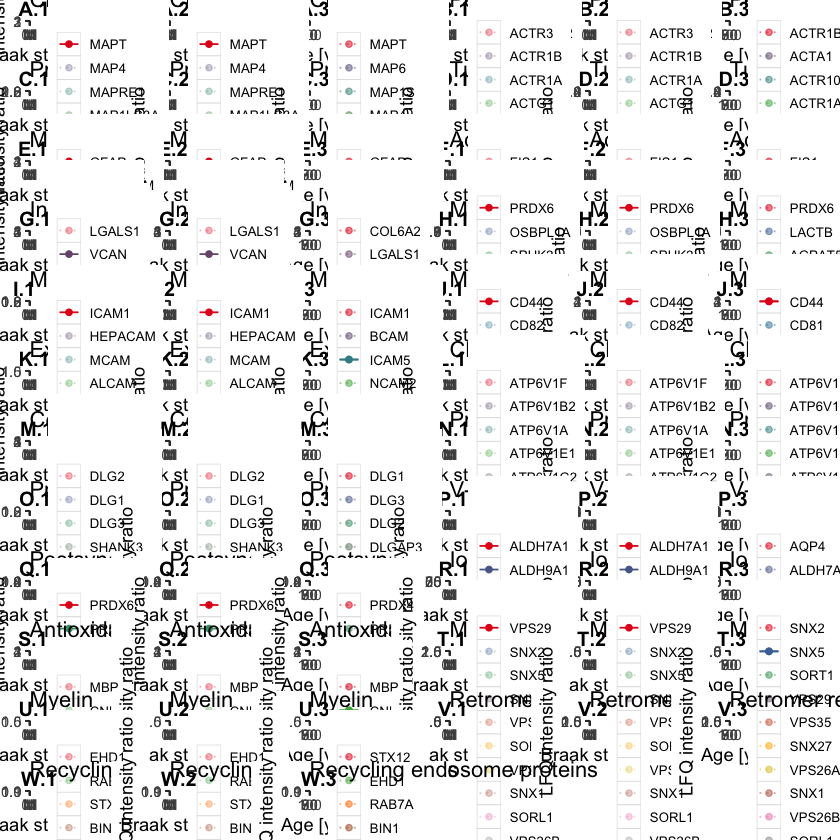

In [166]:
group_plot_merge

In [168]:
save_plot("100_plus_plots/proteomics/protein_group/Protein_group_change_merge_addCHC_20221228.pdf", 
          group_plot_merge, base_height = 40, base_width = 30)

In [474]:
group_plot_merge_v2 <- plot_grid(plotlist = group_list, ncol = 2, #label_size = 12,
                        #labels = labels, hjust = -0.6, vjust = 1.1,
                        align = "hv", axis = "tr")

In [475]:
save_plot("100_plus_plots/proteomics/protein_group/Protein_group_change_merge_addCHC_20230105.pdf", 
          group_plot_merge_v2, base_height = 40, base_width = 23)

In [116]:
idx_proups_in_main <- c(5, 7, 3, 8, 14, 15, 17, 18, 21)

In [117]:
groups_in_main_figure <- NULL
labels_in_main_figure <- NULL
for(i in 1:length(idx_proups_in_main)){
    groups_in_main_figure[[i*2-1]] <- plot_list[[idx_proups_in_main[i]]]
    labels_in_main_figure <- c(labels_in_main_figure, paste(letters[i], ".1", sep=""))
    groups_in_main_figure[[i*2]] <- plot_list_age[[idx_proups_in_main[i]]]
    labels_in_main_figure <- c(labels_in_main_figure, paste(letters[i], ".2", sep=""))
}

In [118]:
group_plot_in_main <- plot_grid(plotlist = groups_in_main_figure, ncol = 4, label_size = 12,
                        labels = labels_in_main_figure, hjust = -0.6, vjust = 1.1,
                        align = "hv", axis = "tblr")

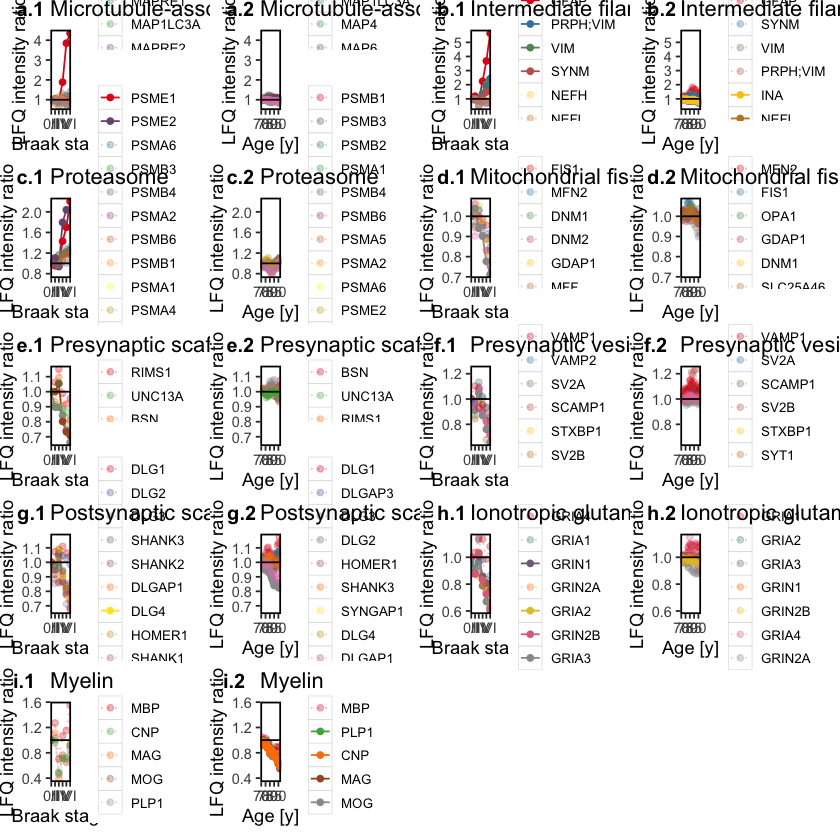

In [119]:
group_plot_in_main

In [120]:
save_plot("100_plus_plots/proteomics/protein_group/Protein_group_change_in_main_figures_removeCHC_20220921.pdf", 
          group_plot_in_main, base_height = 14, base_width = 15)

In [71]:
group_protein_plot <- function(protein_list, title, ylim1, ylim2){
    
    protein_index <- sapply(protein_list, 
                            function(x){return(which(rownames(protein_intensity_combat) == x))})
    if(length(protein_index) != 1)
        exps_at_stage <- as.data.frame(t(apply(protein_intensity_combat[protein_index, ][, -index_CHC], 1,
                                           cal_median_for_stage, metadata[-index_CHC, ]$fBraak)))
    else 
        exps_at_stage <- as.data.frame(t(cal_median_for_stage(as.numeric(protein_intensity_combat[protein_index, ][-index_CHC]),
                                                              metadata[-index_CHC, ]$fBraak)))
    
    #if(length(protein_index) != 1)
    #    exps_at_stage <- as.data.frame(t(apply(protein_intensity_combat[protein_index, ], 1,
    #                                       cal_median_for_stage, metadata$fBraak)))
    #else 
    #    exps_at_stage <- as.data.frame(t(cal_median_for_stage(as.numeric(protein_intensity_combat[protein_index, ]),
    #                                                          metadata$fBraak)))
    
    #print(exps_at_stage)
    
    exps_at_stage <- 2 ^ exps_at_stage
    exps_at_stage <- exps_at_stage / exps_at_stage[, 1]
    
    order_idx <- order(exps_at_stage[, 6], decreasing = TRUE)
    
    #braak  <- sort(unique(metadata[-index_CHC, ]$fBraak))
    braak  <- sort(unique(metadata$fBraak))
    intens <- as.vector(t(exps_at_stage))    
    protein <- NULL
    is_sig <- NULL
    for(i in protein_list){
        protein <- c(protein, rep(i, ncol(exps_at_stage)))
        if (i %in% Braak_sig_proteins){
            is_sig <- c(is_sig, rep("yes", ncol(exps_at_stage)))
        }else{
            is_sig <- c(is_sig, rep("no", ncol(exps_at_stage)))
        }
    }
    
    braak <- rep(braak, nrow(exps_at_stage))
    
    plot_df <- data.frame(protein = protein,
                          intens = intens,
                          braak = braak,
                          alpha = is_sig)
    
    plot_df$protein <- factor(plot_df$protein, levels = protein_list[order_idx])
    
    #print(plot_df)
    
    p <- ggplot(plot_df, aes(x = braak, y = intens)) +
            geom_line(aes(linetype = protein, alpha = alpha)) +
            geom_point(aes(alpha = alpha)) +
            xlab("Braak stage") + 
            ylab("LFQ intensity ratio") +
            ggtitle(title) +
            scale_x_continuous(breaks=seq(1,6,1), labels = c("0/I", "II", "III", "IV", "V", "VI")) +
            ylim(ylim1, ylim2) + 
            scale_linetype_manual(name = "", breaks = as.factor(protein_list[order_idx]),
                                  #values = seq(1, length(protein_list)),
                                  values = c(2, 1),
                                  labels = protein_list[order_idx]) +
            scale_alpha_manual(name = "", breaks = c("no", "yes"),
                                  values = c(1, 1)) +
            guides(alpha = FALSE) +
    
            geom_hline(yintercept=1)+
            
            theme(#plot.background = element_rect(),    # Background of the entire plot
                panel.background = element_rect(fill = "white"),   # Background of plotting area
                panel.border = element_rect(colour = "gray", fill=NA, size=1), 
                panel.grid = element_line(),         # All grid lines
                legend.key=element_rect(fill='white', colour = "gray", size = 0.1),
                legend.key.size = unit(0.5, 'cm'), #change legend key size
                legend.key.height = unit(0.5, 'cm'), #change legend key height
                legend.key.width = unit(0.5, 'cm'),
                legend.text = element_text(size = 8, color = "black"),
                plot.margin = ggplot2::margin(0, 0, 0.3, 0, "cm")
            )
                
    
    return(p)
}

In [40]:
CD44 <- c("CD44")
title <- c("")
pdf("100_plus_plots/proteomics/protein_group/CD44_Braak_stage_removeCHC.pdf")
group_protein_plot(CD44, title)
dev.off()

pdf 
  2

In [41]:
pdf("100_plus_plots/proteomics/protein_group/CD44_Age.pdf")
group_protein_age_plot(CD44, title)
dev.off()

pdf 
  2

In [62]:
GFAP <- c("GFAP")
title <- c("")
pdf("100_plus_plots/proteomics/protein_group/GFAP_Braak_stage_removeCHC.pdf")
group_protein_plot(GFAP, title, 0.5, 6)
dev.off()

pdf 
  2

In [81]:
pdf("100_plus_plots/proteomics/protein_group/GFAP_Age_dark_line.pdf")
group_protein_age_plot(GFAP, title, 0.5, 6)
dev.off()

pdf 
  2

In [69]:
#protein_list <- c("CD44")
protein_list <- c("MOG", "MAG", "PLP1")
#protein_list <- c("NEFL", "NEFM", "NEFH")
title <- c("")
pdf("100_plus_plots/proteomics/protein_group/Myelin_Braak_stage_removeCHC.pdf")
group_protein_plot(protein_list, title)
dev.off()
pdf("100_plus_plots/proteomics/protein_group/Myelin_Age.pdf")
group_protein_age_plot(protein_list, title)
dev.off()

pdf 
  2

pdf 
  2

In [83]:
protein_list <- c("NEFL", "NEFM", "NEFH")
title <- c("")
pdf("100_plus_plots/proteomics/protein_group/Neurofilament_Braak_stage_removeCHC.pdf")
group_protein_plot(protein_list, title)
dev.off()
pdf("100_plus_plots/proteomics/protein_group/Neurofilamentn_Age.pdf")
group_protein_age_plot(protein_list, title)
dev.off()

pdf 
  2

pdf 
  2

In [73]:
protein_list <- c("PCSK1", "HSPA12A")
title <- c("")
pdf("100_plus_plots/proteomics/protein_group/PCSKandHSPA_Braak_stage_removeCHC.pdf")
group_protein_plot(protein_list, title, 0.35, 1.3)
dev.off()
pdf("100_plus_plots/proteomics/protein_group/PCSKandHSPA_Age.pdf")
group_protein_age_plot(protein_list, title, 0.35, 1.3)
dev.off()

pdf 
  2

pdf 
  2

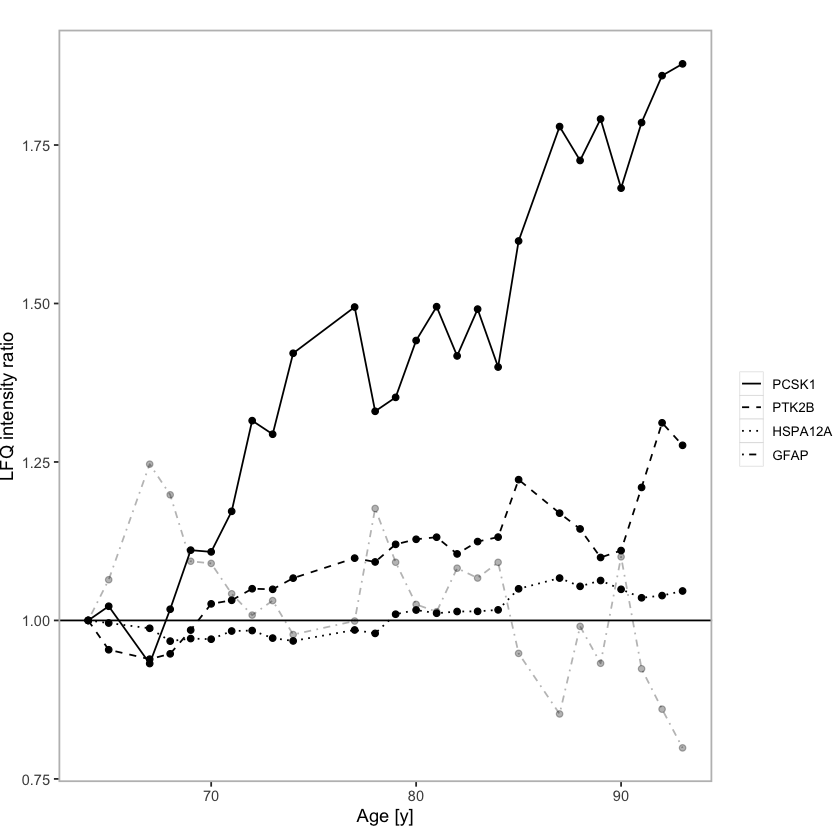

In [52]:
protein_list <- c("GFAP", "PCSK1", "PTK2B", "HSPA12A")
title <- c("")

group_protein_age_plot_AD(protein_list, title)

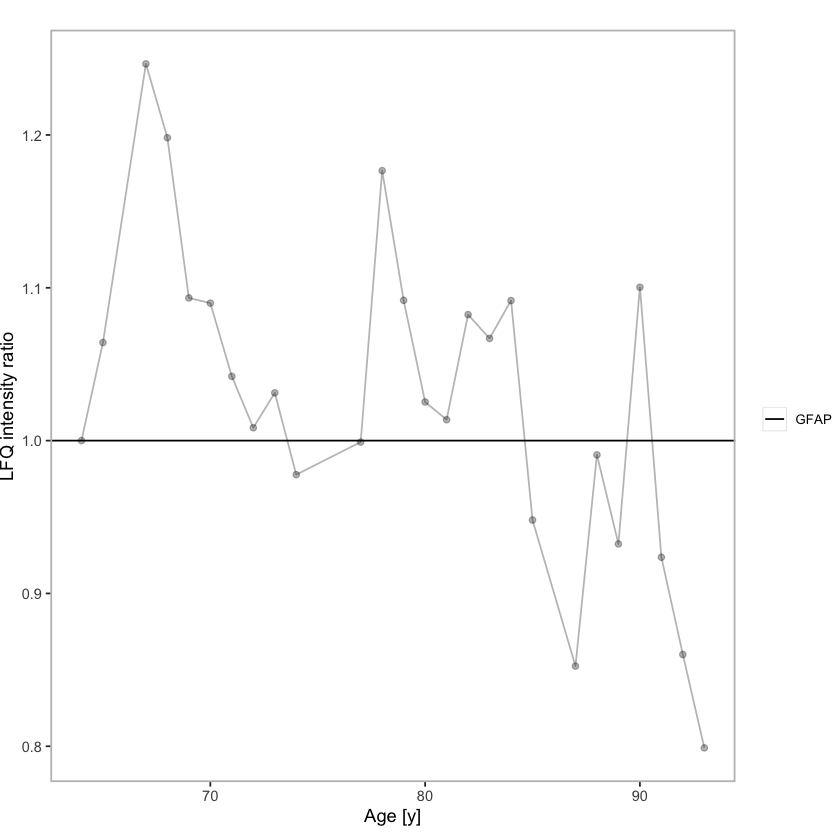

In [51]:
group_protein_age_plot_AD(protein_list, title)

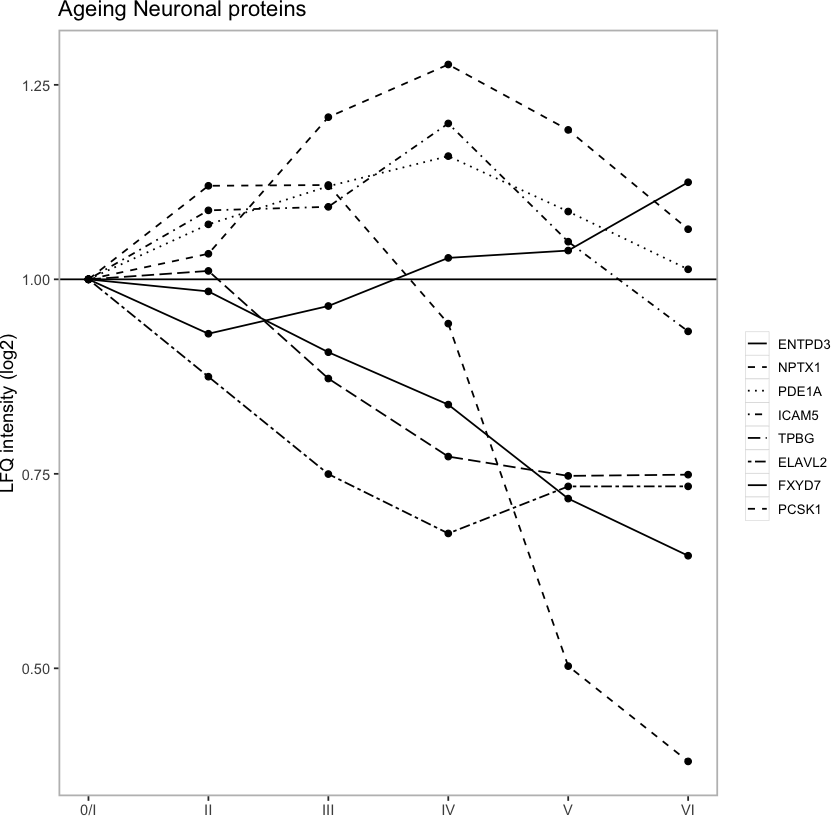

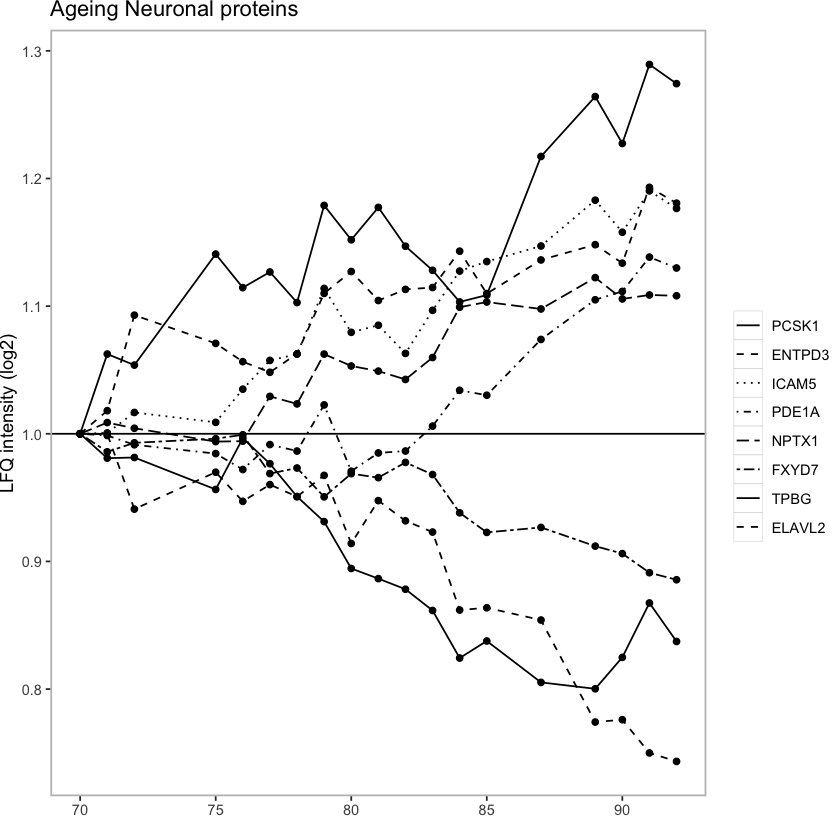

In [26]:
protein_list <- c("ELAVL2", "TPBG", "FXYD7", "NPTX1", 
                       "PCSK1", "ENTPD3", "ICAM5", "PDE1A")
title <- c("Ageing Neuronal proteins")
#jpeg("100_plus_plots/proteomics/protein_group_in_paper/Guus_Chaperones.jpg", 
#     width = 5, height = 5, units = 'in', res = 300)
#plot_list[["CHAP"]] <- 
group_protein_plot(protein_list, title)
#plot_list_age[["CHAP"]] <- 
group_protein_age_plot(protein_list, title)
#dev.off()

In [92]:
Ubiquitin_protein_list <- c("UBA1", "UBA5", "UBE2K", "UBXN1", "UBFD1",
                            "UBE3A", "UBL4A", "UBQLN2", "UBR4", "UBXN6")
title <- c("Ubiquitin")
jpeg("100_plus_plots/proteomics/protein_group_in_paper/Guus_Ubiquitin.jpg", 
     width = 10, height = 5, units = 'in', res = 300)
group_protein_plot(Ubiquitin_protein_list, title)
dev.off()

pdf 
  2

In [48]:
Postsynapse_protein_list <- c("CAP1", "CAP2", "CFL1", "CFL2", "TWF1", "PFN1", "ARPC1A", "ARPC2", "ARPC3", 
                              "ARPC4;ARPC4-TTLL3", "ARPC5", "ARPC5L")
title <- c("Postsynaptic actin-associated proteins")
jpeg("100_plus_plots/proteomics/protein_group_in_paper/Postsynaptic_actin-associated.jpg", 
     width = 6, height = 5, units = 'in', res = 300)
group_protein_plot(Postsynapse_protein_list, title)
dev.off()

pdf 
  2

In [55]:
Actin_protein_list <- c("ACTA1", "ACTB", "ACTG1")
title <- c("Actin proteins")
jpeg("100_plus_plots/proteomics/protein_group_in_paper/Actin_proteins.jpg", 
     width = 6, height = 5, units = 'in', res = 300)
group_protein_plot(Actin_protein_list, title)
dev.off()

pdf 
  2

In [56]:
Actin_protein_list <- c('ACTN1', 'ACTN2', 'ACTR1A', 'ACTN4', 'ACTR1B', 'ACTR2', 'ACTR3', 'ACTR10', 'ACTR3B')
title <- c("Actin-associated proteins")
jpeg("100_plus_plots/proteomics/protein_group_in_paper/Actin-associated_proteins.jpg", 
     width = 6, height = 5, units = 'in', res = 300)
group_protein_plot(Actin_protein_list, title)
dev.off()

pdf 
  2

In [45]:
plist <- c("CAP1", "CAP2", "CFL1", "CFL2", "TWF1", "PFN1", "ARPC1A", "ARPC2", "ARPC3", "ARPC4;ARPC4-TTLL3", 
  "ARPC5", "ARPC5L", "ACTA1", "ACTB", "ACTG1", 'ACTN1', 'ACTN2', 'ACTR1A', 'ACTN4', 'ACTR1B', 'ACTR2', 
  'ACTR3', 'ACTR10', 'ACTR3B')

In [46]:
plist[which(plist %in% Braak_proteins_472$protein)]

[1] "CAP2"  "PFN1"  "ACTN1" "ACTN2"

In [60]:
Braak_proteins_472[Braak_proteins_472$protein == "ACTN1", ]

,protein,gene,p_value_ANOVA,adj.p_value_ANOVA,effect_size_ANOVA,effect_size_lm,p_value_lm,adj.p_value_lm
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
76,ACTN1,ACTN1,2.222958e-11,3.2616e-10,-0.7042222,-0.1004065,8.966482e-14,6.947512e-13
